In [1]:
! python --version

Python 3.9.16


# 1.ライブラリの読み込み


In [2]:
%pip install pandas numpy matplotlib seaborn fuzzywuzzy python-Levenshtein lightgbm scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
from itertools import combinations
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import fuzzywuzzy 
from sklearn.preprocessing import LabelEncoder

In [4]:
!pip show fuzzywuzzy


Name: fuzzywuzzy
Version: 0.18.0
Summary: Fuzzy string matching in python
Home-page: https://github.com/seatgeek/fuzzywuzzy
Author: Adam Cohen
Author-email: adam@seatgeek.com
License: GPLv2
Location: c:\users\histan\anaconda3\envs\d2l\lib\site-packages
Requires: 
Required-by: 


# 2.データの読み込みと確認

In [5]:
# データの読み込み
# MacBookの「ダウンロード」フォルダ内のファイルパスを指定します。
train  = pd.read_csv('C:/Users/histan/Desktop/Personal Files/立教大学/コンペ/Signate/train.csv')
test = pd.read_csv('C:/Users/histan/Desktop/Personal Files/立教大学/コンペ/Signate/test.csv')

# データの確認
print(train.head())
print(test.head())

# 欠損値の確認
print(train.isnull().sum())

# データの形状確認
print(train.shape)
print(test.shape)

   id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0   50歳     Self Enquiry         2            900秒  Large Business   
1   1   56歳  Company Invited         1             14分        Salaried   
2   2   NaN     Self Enquiry         1             10分  Large Business   
3   3  三十七歳     Self Enquiry         2           1080秒  Small Business   
4   4   48歳  Company Invited         3           1020秒  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1    

In [6]:
#データの確認
print(train.head())
print(test.head())

   id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0   50歳     Self Enquiry         2            900秒  Large Business   
1   1   56歳  Company Invited         1             14分        Salaried   
2   2   NaN     Self Enquiry         1             10分  Large Business   
3   3  三十七歳     Self Enquiry         2           1080秒  Small Business   
4   4   48歳  Company Invited         3           1020秒  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1    

# 3.欠損値の確認

In [7]:
train.isnull().sum()

id                          0
Age                       100
TypeofContact               6
CityTier                    0
DurationOfPitch           121
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          33
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              22
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              56
customer_info               0
ProdTaken                   0
dtype: int64

In [8]:
print(train.shape)
print(test.shape)

(3489, 18)
(3489, 17)


# 4.前処理

In [9]:
#性別データ
import unicodedata

def normalize_gender(gender):
    # 全角を半角に変換し、小文字に変換する
    normalized = unicodedata.normalize('NFKC', gender).lower().strip()
    return normalized

gender_data = train["Gender"]

# 正規化したデータを格納するリスト
normalized_gender_data = []

for gender in gender_data:
    normalized_gender = normalize_gender(gender)
    normalized_gender_data.append(normalized_gender)

print(normalized_gender_data)
# 年齢データのリストを変換後のデータで更新
train["Gender"] = normalized_gender_data

# 更新されたデータフレームを確認
print(train.head())

['male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'fe male', 'female', 'female', 'male', 'male', 'male', 'female', 'fe male', 'fe male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'fe male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'fe male', 'female', 'male', 'male', 'male', 'male', 'male', 'fe male', 'female', 'male', 'female', 'fe male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'femal

In [10]:
#年齢データ
import re

def extract_age(text):
    # 年齢を表すテキストから数値を抽出する正規表現パターン
    pattern = r'\d+'

    # 漢数字と対応するアラビア数字の辞書
    kanji_to_arabic = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10
    }

    # Check if text is a valid string before applying regex
    if isinstance(text, str):
        # テキストから数値を抽出
        match = re.search(pattern, text)
        if match:
            # 数値がアラビア数字である場合
            return int(match.group())
        else:
            # 数値が漢数字である場合
            numeric_age = 0
            chars = list(text)  # テキストを1文字ずつリストに変換
            i = 0
            while i < len(chars):
                char = chars[i]
                if char in kanji_to_arabic:
                    # 「十」が入る場合
                    if char == '十':
                        if i == 0:
                            # 「十」が最初に来る場合は10を足す
                            numeric_age += 10
                        else:
                            # 「十」が2回目以降に来る場合はそのまま足す
                            numeric_age += kanji_to_arabic[char]
                    else:
                        # 「十」以外の漢数字の場合
                        numeric_age += kanji_to_arabic[char]
                i += 1
            return numeric_age
    else:
        return None  # Handle non-string values by returning None

# 年齢データのリスト
age_data = train["Age"]

# 数値データに変換した年齢を格納するリスト
numeric_age_data = []

# 各要素を数値データに変換
for age_text in age_data:
    numeric_age = extract_age(age_text)
    numeric_age_data.append(numeric_age)

print(numeric_age_data)

[50, 56, None, 20, 48, 19, 47, 49, 33, 31, 51, 46, 49, 51, 53, 20, 25, 18, 20, 44, 30, 34, 29, 56, 30, 41, None, 50, 52, 22, 36, 52, 46, 30, 28, 25, 16, 50, 48, 50, 38, 16, 42, 50, 33, 35, 59, 17, 32, 47, 42, 53, 56, 33, 58, 33, 32, 50, 40, 18, 47, 47, 52, 29, 44, 54, 51, 59, 25, 29, 21, 56, 50, 57, 37, 20, 53, 30, 35, 36, 36, 38, 49, 37, 50, 51, 43, 14, None, 54, None, 26, 40, 31, 27, 40, None, 33, 20, 58, 33, 20, 32, 34, 20, 51, 40, 26, 22, 46, 21, 24, 45, 33, 33, 56, 36, 41, 50, 31, 22, 38, 38, 31, 18, 52, 45, 30, 38, 43, 43, 35, 26, 46, 52, 39, 46, 43, 46, 40, 50, 55, 50, 58, 27, 50, 36, 50, 34, 24, 53, 38, 45, 50, 38, 41, 39, 30, 27, 14, 46, 40, 52, 30, 43, 27, 36, 40, 33, 31, 31, 28, 26, None, 55, 58, 31, 32, 60, 33, 27, 14, 25, 28, 50, 27, 22, 49, 24, 51, 24, 31, None, 32, 60, 46, 39, 48, 19, None, 47, 45, 28, 40, 29, 59, 17, 47, None, 37, 30, 52, 46, 16, 30, 21, None, 58, 33, 31, 49, 50, 20, 26, 22, 50, 59, 39, 40, 20, 57, 39, 38, 36, 24, 31, 23, 33, 32, 52, 30, 32, 42, 45, 40,

In [11]:
# 年齢データのリストを変換後のデータで更新
train["Age"] = numeric_age_data
#平均値で欠損値を埋めた場合
train['Age'].fillna(train['Age'].mean(), inplace=True)


In [12]:
print(train["Age"].head())

0    50.000000
1    56.000000
2    37.976394
3    20.000000
4    48.000000
Name: Age, dtype: float64


In [13]:
# pd.get_dummiesを使って、カテゴリ変数をダミー変数に変換します。
# columns パラメータでダミー変数化する特徴量を指定します。
train = pd.get_dummies(train, columns=["TypeofContact", "Occupation"])
test = pd.get_dummies(test, columns=["TypeofContact", "Occupation"])

In [14]:
#TypeofContact_Company Invited列の内容を確認します。
train["TypeofContact_Company Invited"].head()

0    False
1     True
2    False
3    False
4     True
Name: TypeofContact_Company Invited, dtype: bool

In [15]:
# Occupationのダミー変数の一部を確認します。
train[['Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business']].head()

Occupation_Large Business  Occupation_Salaried  Occupation_Small Business
0                       True                False                      False
1                      False                 True                      False
2                       True                False                      False
3                      False                False                       True
4                      False                False                       True

In [16]:
#DurationOfPitch
# テキストデータから数字の部分だけを抽出して数値データに変換
data_numeric = []
for item in train["DurationOfPitch"]:
    if pd.notna(item):
        if '秒' in item:
            seconds = int(item.replace('秒', ''))
            minutes = seconds / 60
            data_numeric.append(minutes)
        elif '分' in item:
            minutes = int(item.replace('分', ''))
            data_numeric.append(minutes)
    else:
        data_numeric.append(pd.NA)

# 数値データに変換した列を元のデータフレームに追加
train["DurationOfPitch"] = data_numeric


In [17]:
#平均値で欠損値を埋めた場合
train['DurationOfPitch'].fillna(train['DurationOfPitch'].mean(), inplace=True)

In [18]:
#NumberOfFollowupsの前処理
#平均値で欠損値を埋めた場合
train['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean(), inplace=True)

In [19]:
#ProductPitchedの前処理、文字が正しい形に変更する
# ユニークな値を取得
unique_values = train['ProductPitched'].unique()

# ユニークな値を表示
print("Unique values in 'ProductPitched':")
for value in unique_values:
    print(value)

Unique values in 'ProductPitched':
Basic
Standard
Super Deluxe
basic
SUPER DELUXE
super deluxe
BASIC
Deluxe
deluxe
STANᗞARD
STANDARD
Вasic
DELUXE
ꓢuper De|uxe
Ѕuper Deluxe
BAՏIC
Basıc
King
Super De|uxe
king
standard
KING
BΑSIC
B𝖺sic
De|uxe
ᎠELUXE
Basiϲ
de|u×e
Delu×e
Standar𝔡
Basi𝘤
Βasic
Տuper Deluxe
Staոdard
BAꓢIC
ᗞeluxe
Տtandard
Βası𝘤
Kıng
Baｓic
basıc
super de|uxe
Stand𝖺rd
S𝘵andard
𐊡asic
St𝖺ndard
Super ᗞeluxe
de|uxe
ｓuper deluxe
STANDARᎠ
Basiс
DΕLUXΕ
ꓢuper Deluxe
BASΙC
ꓢtandard
В𝖺sic
Standa𝘳d
basiϲ
staոdard
Super Ꭰeluxe
DELUXΕ
Ѕtandard
𐊡asi𝘤
Ꭰeluxe
Kıոg
𝙳eluxe
Kiոg
Βasıc
BASIС
SUPER DΕLUXE
B𝖺si𝘤
ΒASIС
Super 𝙳eluxe
Տtanda𝘳d
Basıϲ
ЅTANDARD


In [20]:
category_map = {
    'basic': 'basic', 'Basic': 'basic', 'BASIC': 'basic', 'Basiϲ': 'basic', 'Βasic': 'basic',
    'standard': 'standard', 'Standard': 'standard', 'STANDARD': 'standard',
    'STANᗞARD': 'standard', 'Standar𝔡': 'standard', 'Staոdard': 'standard',
    'BAꓢIC': 'standard', 'ᗞeluxe': 'deluxe', 'Տtandard': 'standard', 'Βası𝘜': 'standard',
    'king': 'king', 'King': 'king', 'KING': 'king', 'Kıng': 'king', 'Kiոg': 'king',
    'super deluxe': 'superdeluxe', 'Super Deluxe': 'superdeluxe', 'super de|uxe': 'superdeluxe',
    'ꓢuper De|uxe': 'superdeluxe', 'Ѕuper Deluxe': 'superdeluxe', 'Super ᗞeluxe': 'superdeluxe',
    'SUPER DELUXE': 'superdeluxe', 'SUPER DΕLUXE': 'superdeluxe', 'Super 𝙳eluxe': 'superdeluxe',
    'deluxe': 'deluxe', 'Deluxe': 'deluxe', 'DELUXE': 'deluxe', 'De|uxe': 'deluxe',
    'Delu×e': 'deluxe', 'de|u×e': 'deluxe', 'De|uxe': 'deluxe', 'Deluxe': 'deluxe',
    'BΑSIC': 'basic', 'B𝖺sic': 'basic', 'Βasic': 'basic', 'Basiϲ': 'basic',
    'Basiϲ': 'basic', 'BASİС': 'basic', 'ΒASIС': 'basic', 'B𝖺si𝘄': 'basic',
    'Basiϲ': 'basic', 'BASIС': 'basic', 'Basiϲ': 'basic'
}

# 変換関数
def map_product_pitched(value):
    for key in category_map:
        if key.lower() == value.lower():
            return category_map[key]
    return 'unknown'

# データの変換
train['ProductPitched'] = train['ProductPitched'].apply(map_product_pitched)

# カテゴリのカウント
category_counts = train['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1118
deluxe         1039
standard        825
superdeluxe     314
king            125
unknown          68
Name: count, dtype: int64


In [21]:
# 欠損値補完のために、各カテゴリの割合に基づいて'unknown'を分配
def fill_unknowns(df):
    # 各カテゴリの割合を計算
    category_counts = df['ProductPitched'].value_counts()
    total_unknown = df[df['ProductPitched'] == 'unknown'].shape[0]

    # unknownカテゴリを各カテゴリの割合に基づいて補完
    proportions = category_counts / category_counts.sum()
    fill_counts = (proportions * total_unknown).astype(int)

    for category, count in fill_counts.items():
        if count > 0:
            # 'unknown'を各カテゴリに分配
            indices_to_fill = df[df['ProductPitched'] == 'unknown'].index[:count]
            df.loc[indices_to_fill, 'ProductPitched'] = category

    return df

# 'unknown'の補完
train_filled = fill_unknowns(train)

category_counts = train['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1139
deluxe         1059
standard        841
superdeluxe     320
king            127
unknown           3
Name: count, dtype: int64


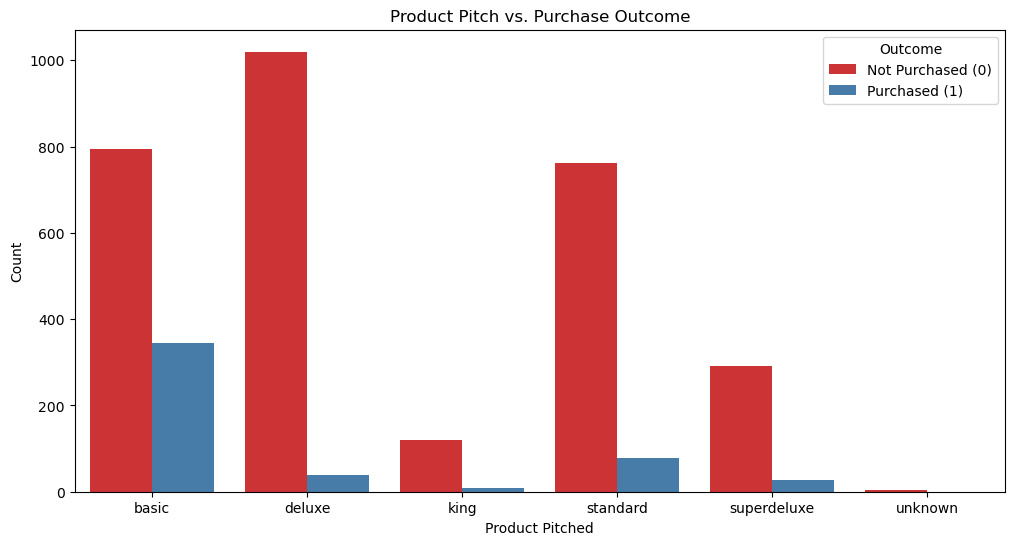

In [22]:
# 各カテゴリごとの成約と不成約のカウントを集約
summary = train.groupby(['ProductPitched', 'ProdTaken']).size().unstack(fill_value=0)
summary.columns = ['Not Purchased (0)', 'Purchased (1)']
summary = summary.reset_index()

# 棒グラフの設定
plt.figure(figsize=(12, 6))
summary_melted = summary.melt(id_vars='ProductPitched', var_name='Outcome', value_name='Count')

# 棒グラフの作成
sns.barplot(x='ProductPitched', y='Count', hue='Outcome', data=summary_melted, palette='Set1')

plt.title('Product Pitch vs. Purchase Outcome')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

In [23]:
print(train["PitchSatisfactionScore"].isnull().sum())
print(train["PitchSatisfactionScore"].dtype)

0
int64


In [24]:
train["customer_info"].isnull().sum()

0

In [25]:
train["customer_info"].head()

0        未婚 車未所持 子供なし
1       離婚済み,車あり,子供無し
2    結婚済み、自動車未所有,子供なし
3       離婚済み、車所持、子供無し
4           独身／車所持／無子
Name: customer_info, dtype: object

In [26]:
train["MonthlyIncome"].isnull().sum()

56

In [27]:
train["MonthlyIncome"].head()

0    253905.0
1    404475.0
2    278145.0
3    326805.0
4    258435.0
Name: MonthlyIncome, dtype: object

In [28]:
# データタイプの確認
print(train["MonthlyIncome"].dtype)
# 文字列型から数値型に変換（数値に変換できない値はNaNに置き換え）
train["MonthlyIncome"] = pd.to_numeric(train["MonthlyIncome"], errors='coerce')

print(train["MonthlyIncome"].max())
print(train["MonthlyIncome"].min())
print(train["MonthlyIncome"].mean())
print(train["MonthlyIncome"].median())
print(train["MonthlyIncome"].std())

object
578670.0
238890.0
355531.77161152614
343935.0
75888.32464819665


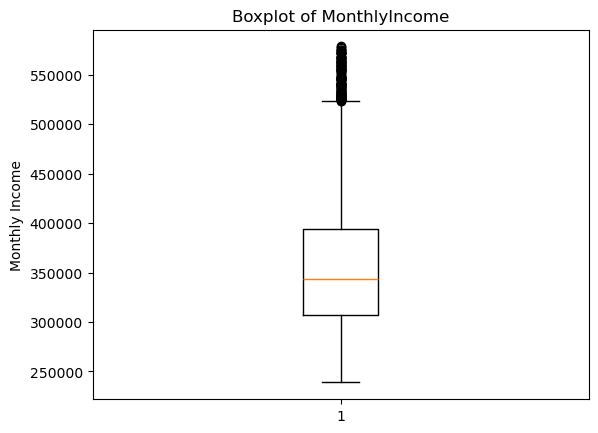

In [29]:
import matplotlib.pyplot as plt

# 箱ひげ図の作成
plt.boxplot(train["MonthlyIncome"].dropna())  # 欠損値があれば無視
plt.title("Boxplot of MonthlyIncome")
plt.ylabel("Monthly Income")
plt.show()


In [30]:
#平均値で欠損値を埋めた場合
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

In [31]:
#NumberOfTripsについて確認
print(train["NumberOfTrips"].isnull().sum())
print(train["NumberOfTrips"].dtype)
print(train["NumberOfTrips"].unique())


22
object
['5' '2' '4' '1' '年に1回' '年に2回' '年に6回' '3' '年に5回' '7' '6' '半年に1回' '年に4回'
 '年に3回' '8' '年に8回' nan '年に7回' '四半期に1回']


In [32]:

def convert_to_number(s):
    if pd.isna(s):
        return s  # 欠損値はそのまま残す
    # 数字だけの値はそのまま返す
    if s.isdigit():
        return int(s)

    # 文字列の値を正規表現で数値に変換
    patterns = {
        '年に(\d+)回': lambda m: int(m.group(1)),
        '半年に1回': lambda m: 2,
        '四半期に1回': lambda m: 4
    }

    for pattern, func in patterns.items():
        match = re.match(pattern, s)
        if match:
            return func(match)

    # パターンに一致しない場合はNaNを返す
    return None

# NumberOfTrips列の値を変換
train['NumberOfTrips'] = train['NumberOfTrips'].apply(convert_to_number)


In [33]:
train['NumberOfTrips'].unique()

array([ 5.,  2.,  4.,  1.,  6.,  3.,  7.,  8., nan])

In [34]:
#最頻値で欠損値を埋めた場合
train['NumberOfTrips'].fillna(train['NumberOfTrips'].mode()[0], inplace=True)


In [35]:
train["NumberOfTrips"].isnull().sum()

0

In [36]:
 #`customer_info` 列を解析して新しい列を作成
train['MaritalStatus'] = train['customer_info'].str.contains('未婚|独身|離婚').map({True: 'Single', False: 'Married'})
train['CarOwnership'] = train['customer_info'].str.contains('車未所持|自動車未所有').map({True: 'No Car', False: 'Car'})
train['HasChildren'] = train['customer_info'].str.contains('子供なし|子供無し|無子').map({True: 'No Children', False: 'Has Children'})

# 前処理結果を確認
print(train[['MaritalStatus', 'CarOwnership', 'HasChildren']].head())
train['MaritalStatus']

  MaritalStatus CarOwnership  HasChildren
0        Single       No Car  No Children
1        Single          Car  No Children
2       Married       No Car  No Children
3        Single          Car  No Children
4        Single          Car  No Children


0        Single
1        Single
2       Married
3        Single
4        Single
         ...   
3484     Single
3485    Married
3486     Single
3487    Married
3488    Married
Name: MaritalStatus, Length: 3489, dtype: object

In [37]:
# 欠損値の確認
missing_values = train['MaritalStatus'].isnull().sum()

print(f"欠損値の数: {missing_values}")
# 欠損値の確認
missing_values = train['CarOwnership'].isnull().sum()

print(f"欠損値の数: {missing_values}")
# 欠損値の確認
missing_values = train['HasChildren'].isnull().sum()

print(f"欠損値の数: {missing_values}")


欠損値の数: 0
欠損値の数: 0
欠損値の数: 0


In [38]:
le = LabelEncoder()
# ラベルエンコーディングの適用
train['MaritalStatus'] = le.fit_transform(train['MaritalStatus'])
train['CarOwnership'] = le.fit_transform(train['CarOwnership'])
train['HasChildren'] = le.fit_transform(train['HasChildren'])

# 結果を確認
print(train[['MaritalStatus', 'CarOwnership', 'HasChildren']].head())

   MaritalStatus  CarOwnership  HasChildren
0              1             1            1
1              1             0            1
2              0             1            1
3              1             0            1
4              1             0            1


In [39]:
train.head(10)

id        Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0   0  50.000000         2             15.0    male                     1.0   
1   1  56.000000         1             14.0    male                     1.0   
2   2  37.976394         1             10.0  female                     1.0   
3   3  20.000000         2             18.0  female                     1.0   
4   4  48.000000         3             17.0  female                     1.0   
5   5  19.000000         2             16.0    male                     1.0   
6   6  47.000000         3             14.0    male                     1.0   
7   7  49.000000         2             22.0    male                     1.0   
8   8  33.000000         2             20.0  female                     1.0   
9   9  31.000000         1             11.0    male                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                4.0          basic                    3.0            5.0   
1                4.0       standard                    3.0            2.0   
2                3.0          basic                    3.0            4.0   
3                3.0       standard                    4.0            1.0   
4                3.0          basic                    4.0            4.0   
5                3.0          basic                    3.0            2.0   
6                3.0    superdeluxe                    4.0            1.0   
7                3.0          basic                    3.0            2.0   
8                3.0          basic                    3.0            4.0   
9                3.0          basic                    3.0            2.0   

   ...     customer_info  ProdTaken TypeofContact_Company Invited  \
0  ...      未婚 車未所持 子供なし          1                         False   
1  ...     離婚済み,車あり,子供無し          0                          True   
2  ...  結婚済み、自動車未所有,子供なし          1                         False   
3  ...     離婚済み、車所持、子供無し          0                         False   
4  ...         独身／車所持／無子          1                          True   
5  ...      独身、車未所持、子供ゼロ          0                         False   
6  ...    独身 自家用車あり 子供なし          0                          True   
7  ...    結婚済み、車未所持、子供なし          0                         False   
8  ...      独身/車未所持/子供無し          1                          True   
9  ...    結婚済み、車所持、非育児家庭          0                          True   

   TypeofContact_Self Enquiry Occupation_Large Business  Occupation_Salaried  \
0                        True                      True                False   
1                       False                     False                 True   
2                        True                      True                False   
3                        True                     False                False   
4                       False                     False                False   
5                        True                     False                False   
6                       False                     False                False   
7                        True                     False                False   
8                       False                      True                False   
9                       False                      True                False   

   Occupation_Small Business  MaritalStatus  CarOwnership  HasChildren  
0                      False              1             1            1  
1                      False              1             0            1  
2                      False              0             1            1  
3                       True              1             0            1  
4                       True              1             0            1  
5                       True              1             1            0  
6                       True              1             0            1  
7                       True              0             1   

In [40]:
train["Designation"]

0            Executive
1       Senior Manager
2            Executive
3       Senior Manager
4            Executive
             ...      
3484         Executive
3485         Executive
3486    Senior Manager
3487                VP
3488         Executive
Name: Designation, Length: 3489, dtype: object

In [41]:
# 全角文字を半角文字に変換する関数
def fullwidth_to_halfwidth(s):
    return ''.join([chr(ord(c) - 0xFEE0) if '！' <= c <= '～' else c for c in s])

# Designation列の全角文字を半角文字に変換
train['Designation'] = train['Designation'].apply(fullwidth_to_halfwidth) # Use 'train' instead of 'np.tracemalloc_domain'

# 変換後のユニークな値を再度確認
unique_designations_after_conversion = train['Designation'].unique() # Also fix typo here: 'traiin' -> 'train'
unique_designations_after_conversion

array(['Executive', 'Senior Manager', 'AVP', 'Manager', 'Senior Manage𝙧',
       'Μanager', 'VP', 'Sеnior Manager', 'ΑVP', 'АVP', 'E×ecutive',
       'Mαnage𝙧', 'Executiѵе', 'Ѕenior Manager', 'Managеr', 'Еxecutivе',
       'Senior Μanαger', 'Еxecutive', 'Exеcutivе', 'Exеcutive',
       'Senior Managе𝙧', 'Manage𝙧', 'Senio𝙧 Manager', 'Manαger',
       'Μanage𝙧', 'Manαgеr', 'Senior Managеr', 'Executivе', 'Executiѵe',
       'Е×еcutive', 'Տenior Μanager', 'Exеcutiѵе', 'Senior Manαger',
       'Mαnager', 'Senior Mαnαger', 'E×еcutiѵe', 'Ѕenior Manαger',
       'Mαnαger', 'Μanagеr', 'Sеnior Managеr', 'Տenior Manager',
       'Mαnagеr', 'Еxеcutivе', 'Senior Mαnager', 'Е×ecutive'],
      dtype=object)

In [42]:
pip install fuzzywuzzy[speedup]


Note: you may need to restart the kernel to use updated packages.


In [43]:
from fuzzywuzzy import process

# 正しい値のリスト
valid_designations = ['executive', 'manager', 'senior manager', 'avp', 'vp']

def fuzzy_correct(s):
    match = process.extractOne(s, valid_designations)
    if match[1] > 50:  # 類似度が80%以上の場合のみ修正
        return match[0]
    else:
        return s

train['Designation'] = train['Designation'].apply(fuzzy_correct)
train['Designation'].unique()

array(['executive', 'senior manager', 'avp', 'manager', 'vp'],
      dtype=object)

In [44]:
train

id        Age  CityTier  DurationOfPitch  Gender  \
0        0  50.000000         2             15.0    male   
1        1  56.000000         1             14.0    male   
2        2  37.976394         1             10.0  female   
3        3  20.000000         2             18.0  female   
4        4  48.000000         3             17.0  female   
...    ...        ...       ...              ...     ...   
3484  3484  40.000000         2             26.0    male   
3485  3485  40.000000         1              9.0    male   
3486  3486  31.000000         1             14.0  female   
3487  3487  56.000000         2             15.0    male   
3488  3488  42.000000         1              9.0    male   

      NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0                        1.0                4.0          basic   
1                        1.0                4.0       standard   
2                        1.0                3.0          basic   
3                        1.0                3.0       standard   
4                        1.0                3.0          basic   
...                      ...                ...            ...   
3484                     2.0                3.0          basic   
3485                     3.0                3.0          basic   
3486                     3.0                2.0       standard   
3487                     3.0                6.0           king   
3488                     3.0                1.0          basic   

      PreferredPropertyStar  NumberOfTrips  ...     customer_info  ProdTaken  \
0                       3.0            5.0  ...      未婚 車未所持 子供なし          1   
1                       3.0            2.0  ...     離婚済み,車あり,子供無し          0   
2                       3.0            4.0  ...  結婚済み、自動車未所有,子供なし          1   
3                       4.0            1.0  ...     離婚済み、車所持、子供無し          0   
4                       4.0            4.0  ...         独身／車所持／無子          1   
...                     ...            ...  ...               ...        ...   
3484                    3.0            3.0  ...   離婚済み 乗用車所持 子供なし          1   
3485                    5.0            5.0  ...     結婚済み、車所持、子供2人          0   
3486                    3.0            5.0  ...      独身／車所持／こども1人          0   
3487                    3.0            7.0  ...  結婚済み、自動車未所有、子供2人          1   
3488                    3.0            3.0  ...    結婚済み,車未所持、子供1人          0   

     TypeofContact_Company Invited  TypeofContact_Self Enquiry  \
0                            False                        True   
1                             True                       False   
2                            False                        True   
3                            False                        True   
4                             True                       False   
...                            ...                         ...   
3484                         False                        True   
3485                         False                        True   
3486                         False                        True   
3487                          True                       False   
3488                         False                        True   

     Occupation_Large Business  Occupation_Salaried  \
0                         True                False   
1                        False                 True   
2                         True                False   
3                        False                False   
4                        False                False   
...                        ...                  ...   
3484                     False                 True   
3485                      True                False   
3486                     False                False   
3487                     False                 True   
3488                     False                False   

      Occupation_Small Business  MaritalStatus  CarOwnership  HasChildren  
0  

# 4.5. 特徴量エンジニアリングとデータの分割


In [45]:
# Genderデータのリスト
gender_data_test = test["Gender"]

# 正規化したデータを格納するリスト
normalized_gender_data_test = []

# 各要素を正規化
for gender in gender_data_test:
    normalized_gender = normalize_gender(gender)
    normalized_gender_data_test.append(normalized_gender)

# テストデータの「Gender」列を更新
test["Gender"] = normalized_gender_data_test

# 更新されたテストデータフレームを確認
print(test.head())

     id  Age  CityTier DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  3489  ４８歳         2             13分    male                     1.0   
1  3490  30代         2             12分  female                     1.0   
2  3491  25歳         1            540秒  female                     1.0   
3  3492  21歳         2            420秒    male                     1.0   
4  3493  41歳         1              7分    male                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  \
0                4.0   Super De|uxe                    3.0             7   
1                4.0       Standard                    3.0             4   
2                4.0          Basic                    3.0             1   
3                4.0          Basic                    4.0             1   
4                4.0          Basic                    3.0             1   

   Passport  PitchSatisfactionScore     Designation MonthlyIncome  \
0         0                  

In [46]:
# 数値データに変換した年齢を格納するリスト
numeric_test_age_data = []

# 各要素を数値データに変換
for age_text in test["Age"]:
    numeric_age = extract_age(age_text)
    numeric_test_age_data.append(numeric_age)

# テストデータに変換後の年齢データに更新
test["Age"] = numeric_test_age_data

# 結果を確認
print(test.head())



     id   Age  CityTier DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  3489  48.0         2             13分    male                     1.0   
1  3490  30.0         2             12分  female                     1.0   
2  3491  25.0         1            540秒  female                     1.0   
3  3492  21.0         2            420秒    male                     1.0   
4  3493  41.0         1              7分    male                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  \
0                4.0   Super De|uxe                    3.0             7   
1                4.0       Standard                    3.0             4   
2                4.0          Basic                    3.0             1   
3                4.0          Basic                    4.0             1   
4                4.0          Basic                    3.0             1   

   Passport  PitchSatisfactionScore     Designation MonthlyIncome  \
0         0            

In [47]:
#平均値で欠損値を埋めた場合
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [48]:
#テキストデータから数字の部分だけを抽出して数値データに変換
data_numeric = []
for item in test["DurationOfPitch"]:
    if pd.notna(item):
        if '秒' in item:
            seconds = int(item.replace('秒', ''))
            minutes = seconds / 60
            data_numeric.append(minutes)
        elif '分' in item:
            minutes = int(item.replace('分', ''))
            data_numeric.append(minutes)
    else:
        data_numeric.append(pd.NA)

# 数値データに変換した列を元のデータフレームに追加
test["DurationOfPitch"] = data_numeric

In [49]:
null_count = test["DurationOfPitch"].isnull().sum()
test['DurationOfPitch'].fillna(train['DurationOfPitch'].mean(), inplace=True)
print("NULL の個数:", null_count)

NULL の個数: 131


In [50]:
null_count = test["NumberOfFollowups"].isnull().sum()
test['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean(), inplace=True)
print("NULL の個数:", null_count)

NULL の個数: 24


In [51]:
# ユニークな値を取得
unique_values = test['ProductPitched'].unique()
# ユニークな値を表示
print("Unique values in 'ProductPitched':")
for value in unique_values:
    print(value)

Unique values in 'ProductPitched':
Super De|uxe
Standard
Basic
Deluxe
Super Deluxe
DELUXE
King
standard
basic
BASIC
basıc
STANDARD
SUPER DELUXE
Ѕtandard
super deluxe
𐊡asic
SUPER ᎠELUXE
SUPER ᗞELUXE
Βasic
king
Basiс
ꓢtandard
Super 𝙳eluxe
ᗞeluxe
Basi𝘤
Staոdard
deluxe
DELUXΕ
De|uxe
Basıc
Delu×e
basiϲ
Baｓic
Вasic
Stand𝖺rd
KING
B𝖺si𝘤
basiс
𝙳eluxe
Ꭰeluxe
BASIС
Super ᗞeluxe
STANDARᎠ
Stan𝔡ard
STΑNDARD
ᗞELUXE
Baｓıc
de|uxe
Super Ꭰeluxe
Super Delu×e
Basıϲ
ꓢuper Deluxe
SUPΕR ᎠELUXE
Ꭰe|uxe
B𝖺sic
Basiϲ
stan𝔡ard
BASΙC
basi𝘤
stand𝖺rd
St𝖺ndard
Kıng
baｓic
Bası𝘤
BASΙС
S𝘵𝖺nda𝘳d
kiոg
Standa𝘳d
standar𝔡
Stand𝖺𝘳d
BAЅIC


In [52]:
# データの変換
test['ProductPitched'] = test['ProductPitched'].apply(map_product_pitched)

# カテゴリのカウント
category_counts = test['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1155
deluxe         1038
standard        745
superdeluxe     313
king            160
unknown          78
Name: count, dtype: int64


In [53]:
# 'unknown'の補完
test_filled = fill_unknowns(test)

category_counts = test['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1180
deluxe         1061
standard        761
superdeluxe     319
king            163
unknown           5
Name: count, dtype: int64


In [54]:
# 文字列型から数値型に変換（数値に変換できない値はNaNに置き換え）
test["MonthlyIncome"] = pd.to_numeric(test["MonthlyIncome"], errors='coerce')
#平均値で欠損値を埋めた場合
test['MonthlyIncome'].fillna(test['MonthlyIncome'].median(), inplace=True)

In [55]:
# 全角文字を半角文字に変換する関数
def fullwidth_to_halfwidth(s):
    return ''.join([chr(ord(c) - 0xFEE0) if '！' <= c <= '～' else c for c in s])

# Designation列の全角文字を半角文字に変換
test['Designation'] = test['Designation'].apply(fullwidth_to_halfwidth)

# 変換後のユニークな値を再度確認
unique_designations_after_conversion = test['Designation'].unique()
unique_designations_after_conversion

array(['AVP', 'Senior Manager', 'Executive', 'Manager', 'VP', 'Executivе',
       'Senior Managеr', 'Exеcutivе', 'Exеcutive', 'Senio𝙧 Manage𝙧',
       'Sеnior Manager', 'Executiѵe', 'Senio𝙧 Manager', 'АVP', 'Mαnager',
       'Managеr', 'ΑVP', 'Μαnager', 'Manage𝙧', 'E×ecutive', 'Mαnαger',
       'Μanager', 'Տenior Manager', 'Еxecutive', 'Senior Manage𝙧',
       'Senior Manαger', 'Senio𝙧 Manαger', 'Manαger', 'Ѕenior Μanage𝙧',
       'Μαnagеr', 'Manαgеr', 'Managе𝙧', 'Տenior Μanager',
       'Senio𝙧 Managеr', 'Senior Μanager', 'Sеnior Managе𝙧',
       'Senio𝙧 Mαnage𝙧', 'Ѕenior Manager', 'Mαnagеr', 'Senior Managе𝙧',
       'Senior Mαnαger', 'Sеnior Managеr', 'Mαnαgеr', 'Sеnio𝙧 Manager',
       'Senior Mαnager'], dtype=object)

In [56]:
from fuzzywuzzy import process

# 正しい値のリスト
valid_designations = ['executive', 'manager', 'senior manager', 'avp', 'vp']

def fuzzy_correct(s):
    match = process.extractOne(s, valid_designations)
    if match[1] > 50:  # 類似度が80%以上の場合のみ修正
        return match[0]
    else:
        return s

test['Designation'] = test['Designation'].apply(fuzzy_correct)
test['Designation'].unique()

array(['avp', 'senior manager', 'executive', 'manager', 'vp'],
      dtype=object)

In [57]:
def convert_to_number(s):
    if pd.isna(s):
        return s  # 欠損値はそのまま残す
    # 数字だけの値はそのまま返す
    if s.isdigit():
        return int(s)

    # 文字列の値を正規表現で数値に変換
    patterns = {
        '年に(\d+)回': lambda m: int(m.group(1)),
        '半年に1回': lambda m: 2,
        '四半期に1回': lambda m: 4
    }

    for pattern, func in patterns.items():
        match = re.match(pattern, s)
        if match:
            return func(match)

    # パターンに一致しない場合はNaNを返す
    return None

# NumberOfTrips列の値を変換
test['NumberOfTrips'] = test['NumberOfTrips'].apply(convert_to_number)


In [58]:
test["NumberOfTrips"].isnull().sum()
#最頻値で欠損値を埋めた場合
test['NumberOfTrips'].fillna(test['NumberOfTrips'].mode()[0], inplace=True)
test["NumberOfTrips"].isnull().sum()
test["NumberOfTrips"].unique()

array([7., 4., 1., 6., 5., 3., 2., 8.])

In [59]:
# `customer_info` 列を解析して新しい列を作成
test['MaritalStatus'] = test['customer_info'].str.contains('未婚|独身|離婚').map({True: 'Single', False: 'Married'})
test['CarOwnership'] = test['customer_info'].str.contains('車未所持|自動車未所有').map({True: 'No Car', False: 'Car'})
test['HasChildren'] = test['customer_info'].str.contains('子供なし|子供無し|無子').map({True: 'No Children', False: 'Has Children'})

# 前処理結果を確認
print(test[['MaritalStatus', 'CarOwnership', 'HasChildren']].head())
test['MaritalStatus']


  MaritalStatus CarOwnership  HasChildren
0       Married          Car  No Children
1       Married       No Car  No Children
2        Single       No Car  No Children
3        Single          Car  No Children
4        Single          Car  No Children


0       Married
1       Married
2        Single
3        Single
4        Single
         ...   
3484    Married
3485    Married
3486     Single
3487    Married
3488     Single
Name: MaritalStatus, Length: 3489, dtype: object

In [60]:
le = LabelEncoder()
# ラベルエンコーディングの適用
test['MaritalStatus'] = le.fit_transform(test['MaritalStatus'])
test['CarOwnership'] = le.fit_transform(test['CarOwnership'])
test['HasChildren'] = le.fit_transform(test['HasChildren'])

# 結果を確認
print(test[['MaritalStatus', 'CarOwnership', 'HasChildren']].head())

   MaritalStatus  CarOwnership  HasChildren
0              0             0            1
1              0             1            1
2              1             1            1
3              1             0            1
4              1             0            1


In [61]:
test.isnull().sum()


id                               0
Age                              0
CityTier                         0
DurationOfPitch                  0
Gender                           0
NumberOfPersonVisiting           0
NumberOfFollowups                0
ProductPitched                   0
PreferredPropertyStar            0
NumberOfTrips                    0
Passport                         0
PitchSatisfactionScore           0
Designation                      0
MonthlyIncome                    0
customer_info                    0
TypeofContact_Company Invited    0
TypeofContact_Self Enquiry       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
MaritalStatus                    0
CarOwnership                     0
HasChildren                      0
dtype: int64

In [62]:
# 予測対象をtargetに格納
target = train["ProdTaken"]

# 必要な列を削除
train = train.drop(columns=["id","customer_info","ProdTaken"], axis=1)
test = test.drop(columns=["id", "customer_info"], axis=1)

# 必要なモジュールをインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

# LabelEncoderでカテゴリ変数を数値に変換
label_encoder = LabelEncoder()
for column in ['Gender', 'ProductPitched', 'Designation']:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_valid[column] = label_encoder.transform(X_valid[column])
    test[column] = label_encoder.transform(test[column])

# 標準化
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
test_sc = scaler.transform(test)

# 予測
lg = LGBMClassifier()
lg.fit(X_train_sc,y_train)
lg_scores = cross_validate(lg, X_train_sc, y_train, scoring ="roc_auc", cv =5)

rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)
rf_scores = cross_validate(rf, X_train_sc, y_train, scoring ="roc_auc", cv =5)

svc = SVC()
svc.fit(X_train_sc,y_train)
svc_scores = cross_validate(lg, X_train_sc, y_train, scoring ="roc_auc", cv =5)

xg = XGBClassifier()
xg.fit(X_train_sc,y_train)
xg_scores = cross_validate(xg,X_train_sc,y_train,scoring ="roc_auc",cv =5)


def model_scores(model_scores):
    for key in model_scores.keys():
        print(key + ' test scores: ', model_scores[key])
    print("Average test score: ", model_scores["test_score"].mean())

scores =[lg_scores,rf_scores,svc_scores,xg_scores]
scores_ =["LGBMClassifier","RandomForestClassifier","SVC","XGBClassifier"]

for i in range(len(scores)):
  print(scores_[i])
  model_scores(scores[i])
  print("\n")

(2616, 21) (873, 21) (2616,) (873,)
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 303, number of negative: 1789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144837

In [63]:
print(train.columns)

Index(['Age', 'CityTier', 'DurationOfPitch', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'Designation', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus', 'CarOwnership',
       'HasChildren'],
      dtype='object')


In [64]:
print(len(lg.feature_importances_))
print(len(train.columns))

21
21


In [65]:
try:
    if len(lg.feature_importances_) == len(train.columns):
        feature_importances = pd.Series(lg.feature_importances_, index=train.columns).sort_values(ascending=False)
        print(feature_importances)
    else:
        raise ValueError("Length of feature_importances_ does not match the number of columns in train.")
except ValueError as e:
    print(f"Error: {e}")


MonthlyIncome                    611
Age                              553
DurationOfPitch                  395
NumberOfTrips                    192
PitchSatisfactionScore           127
NumberOfFollowups                126
NumberOfPersonVisiting           111
CityTier                         105
Gender                            99
ProductPitched                    87
PreferredPropertyStar             86
Designation                       85
MaritalStatus                     75
Passport                          69
CarOwnership                      67
TypeofContact_Company Invited     62
Occupation_Small Business         41
Occupation_Salaried               39
HasChildren                       36
Occupation_Large Business         22
TypeofContact_Self Enquiry        12
dtype: int32


In [66]:
#rf
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier()
#rf.fit(train, target)
#feature_importances = pd.Series(rf.feature_importances_, index=train.columns).sort_values(ascending=False)
#print(feature_importances)


In [67]:
#xgb
#import xgboost as xgb

#xg = xgb.XGBClassifier()
#xg.fit(train, target)
#feature_importances = pd.Series(xg.feature_importances_, index=train.columns).sort_values(ascending=False)
#print(feature_importances)


In [68]:
#permutation_importance
#from sklearn.inspection import permutation_importance

#model = RandomForestClassifier()
#model.fit(train, target)

#result = permutation_importance(model, train, target, n_repeats=10, random_state=42)
#feature_importances = pd.Series(result.importances_mean, index=train.columns).sort_values(ascending=False)
#print(feature_importances)


In [69]:
# 必要な列のみを選択する例（必要に応じて修正）
required_columns = train.columns[:len(lg.feature_importances_)]
train_filtered = train[required_columns]

# フィルタリング後のデータで再度特徴量重要度を取得
feature_importances = pd.Series(lg.feature_importances_, index=train_filtered.columns).sort_values(ascending=False)
print(feature_importances)


MonthlyIncome                    611
Age                              553
DurationOfPitch                  395
NumberOfTrips                    192
PitchSatisfactionScore           127
NumberOfFollowups                126
NumberOfPersonVisiting           111
CityTier                         105
Gender                            99
ProductPitched                    87
PreferredPropertyStar             86
Designation                       85
MaritalStatus                     75
Passport                          69
CarOwnership                      67
TypeofContact_Company Invited     62
Occupation_Small Business         41
Occupation_Salaried               39
HasChildren                       36
Occupation_Large Business         22
TypeofContact_Self Enquiry        12
dtype: int32


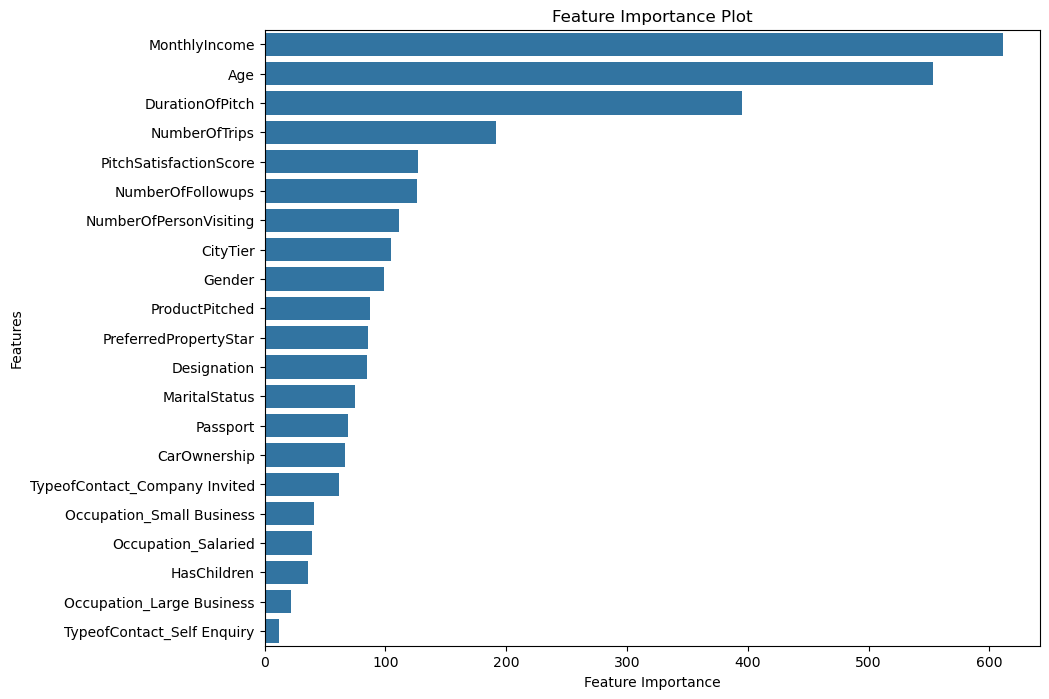

In [70]:
#グラフ表示
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Feature Importance Plot")
plt.show()


In [71]:
train.head()

Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  50.000000         2             15.0    male                     1.0   
1  56.000000         1             14.0    male                     1.0   
2  37.976394         1             10.0  female                     1.0   
3  20.000000         2             18.0  female                     1.0   
4  48.000000         3             17.0  female                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                4.0          basic                    3.0            5.0   
1                4.0       standard                    3.0            2.0   
2                3.0          basic                    3.0            4.0   
3                3.0       standard                    4.0            1.0   
4                3.0          basic                    4.0            4.0   

   Passport  ...     Designation MonthlyIncome  TypeofContact_Company Invited  \
0         1  ...       executive      253905.0                          False   
1         1  ...  senior manager      404475.0                           True   
2         0  ...       executive      278145.0                          False   
3         0  ...  senior manager      326805.0                          False   
4         0  ...       executive      258435.0                           True   

   TypeofContact_Self Enquiry  Occupation_Large Business  Occupation_Salaried  \
0                        True                       True                False   
1                       False                      False                 True   
2                        True                       True                False   
3                        True                      False                False   
4                       False                      False                False   

   Occupation_Small Business  MaritalStatus  CarOwnership  HasChildren  
0                      False              1             1            1  
1                      False              1             0            1  
2                      False              0             1            1  
3                       True              1             0            1  
4                       True              1             0            1  

[5 rows x 21 columns]

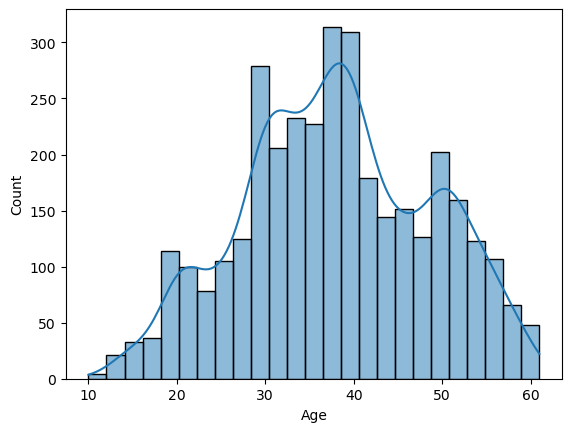

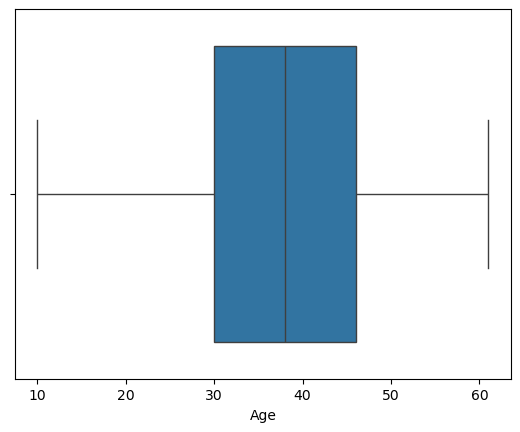

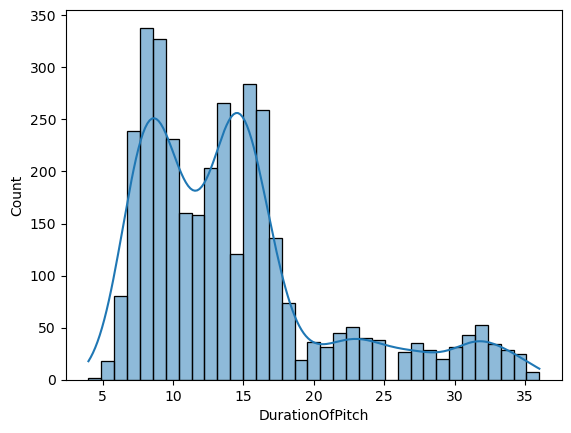

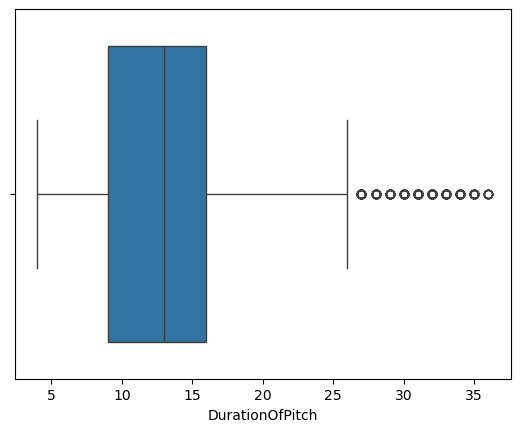

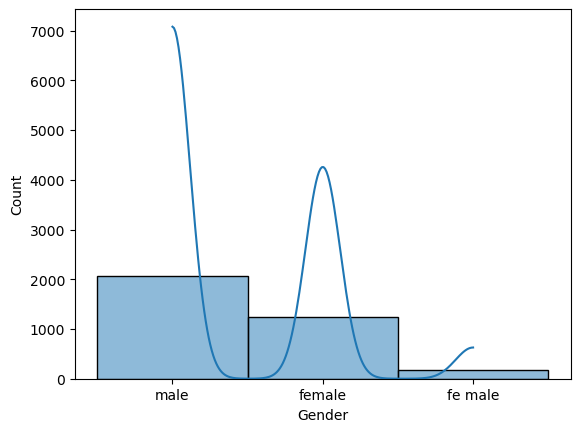

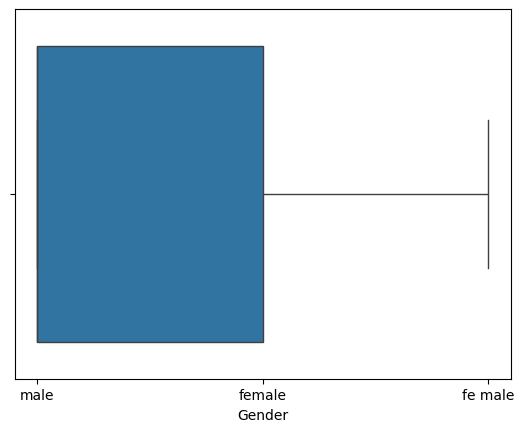

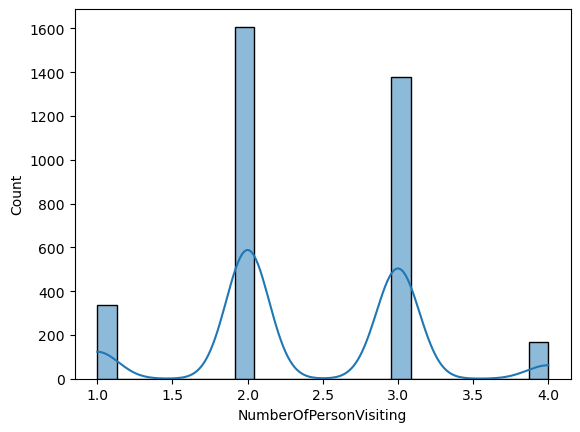

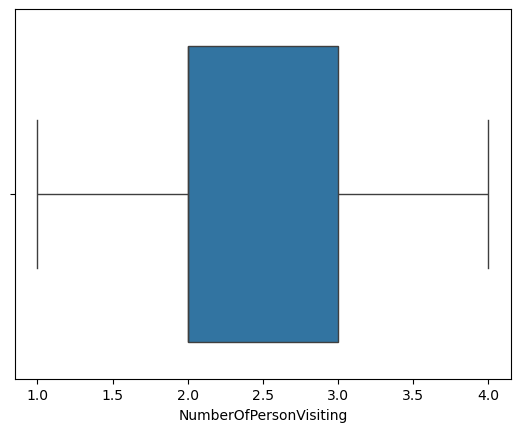

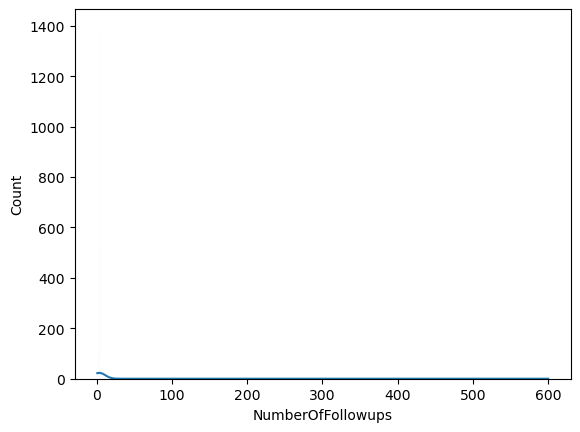

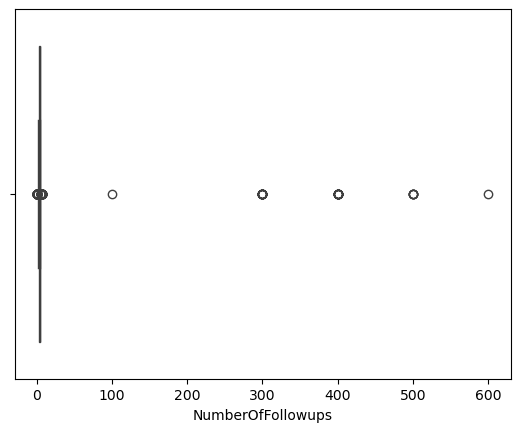

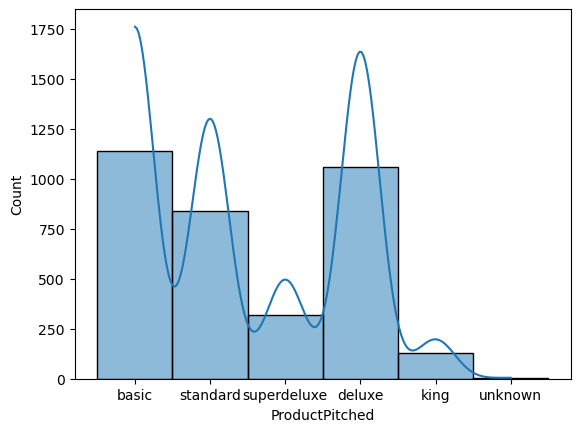

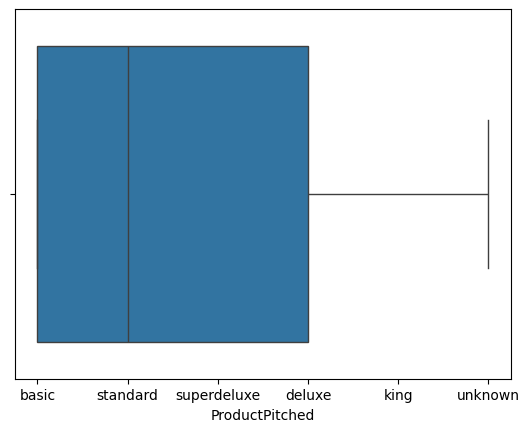

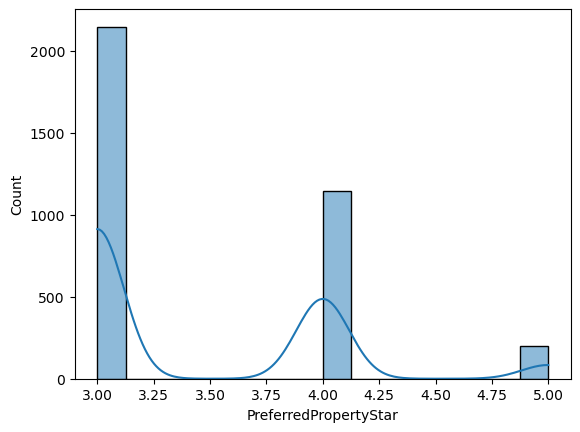

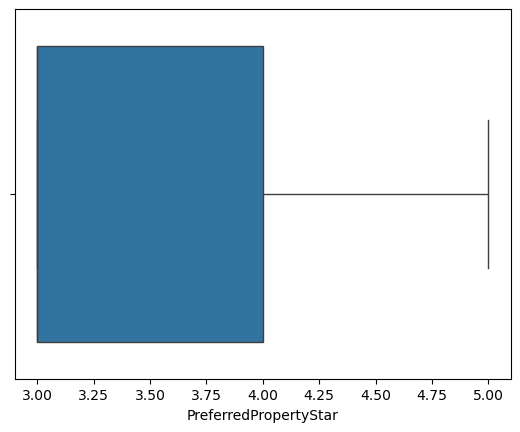

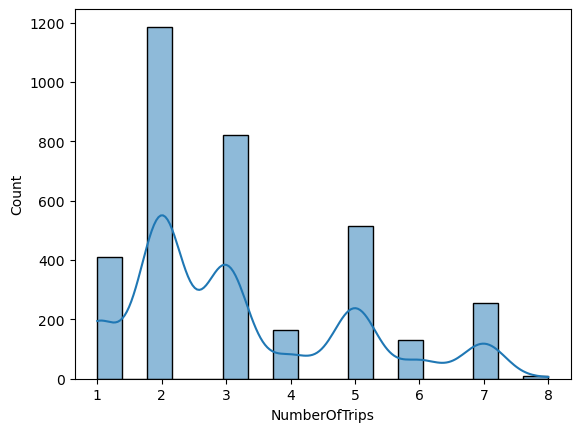

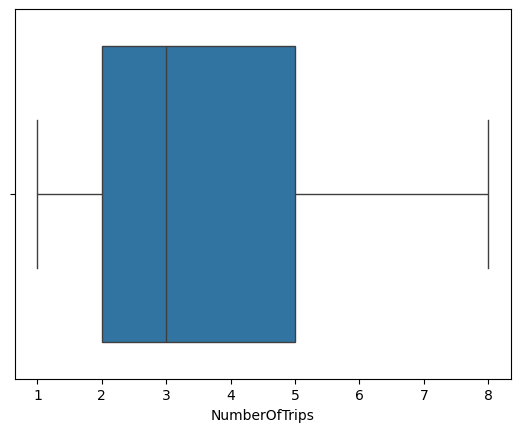

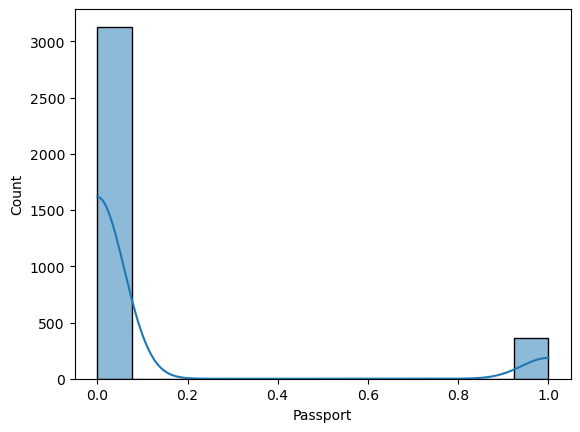

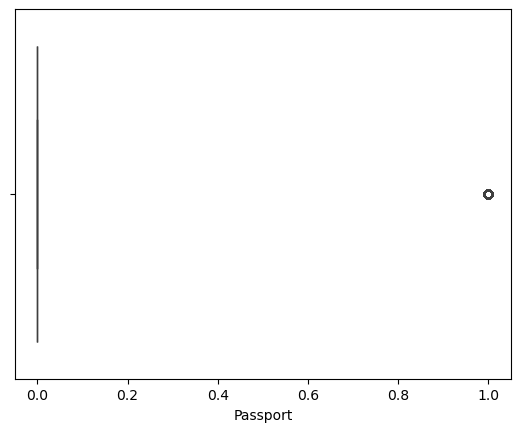

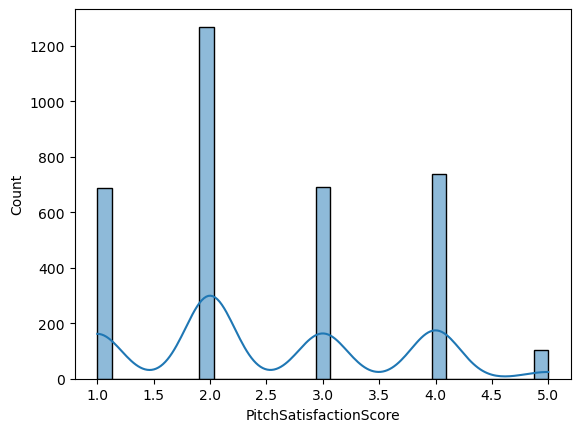

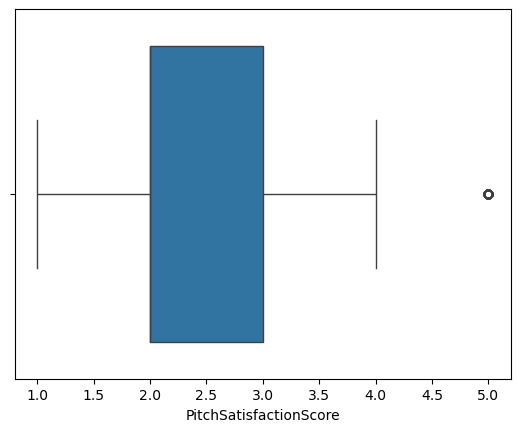

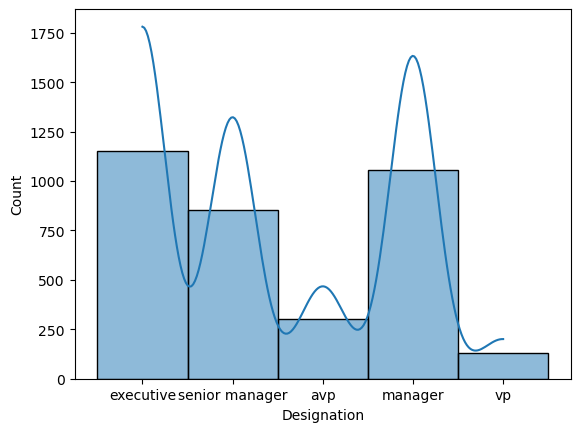

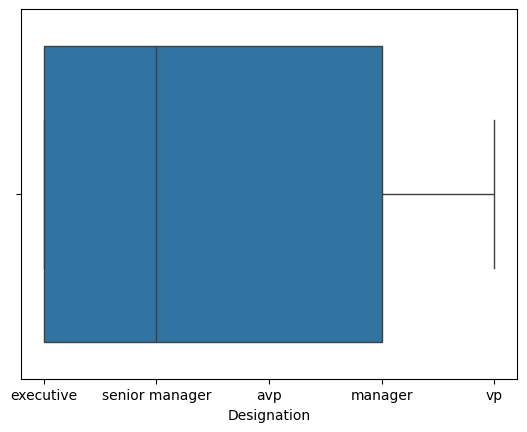

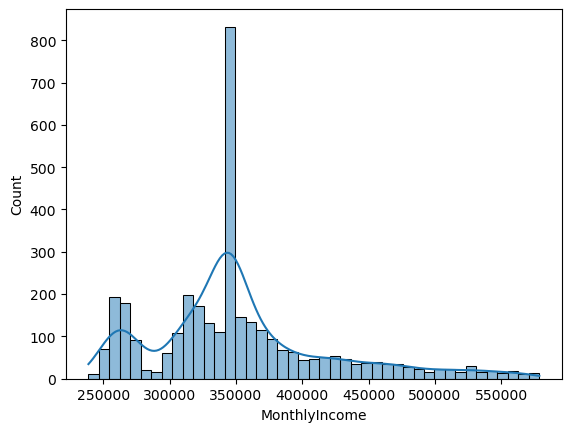

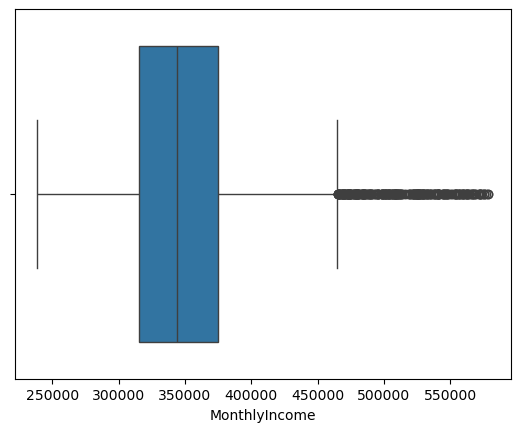

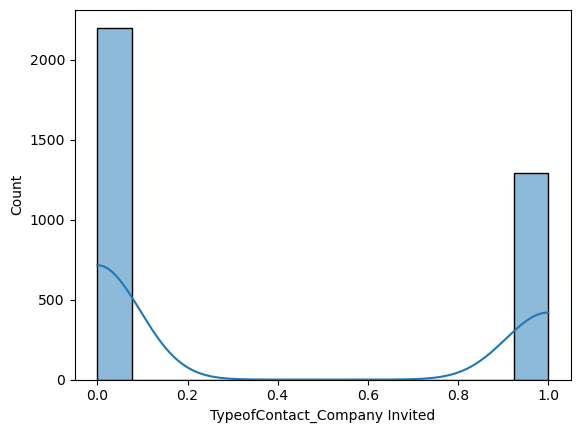

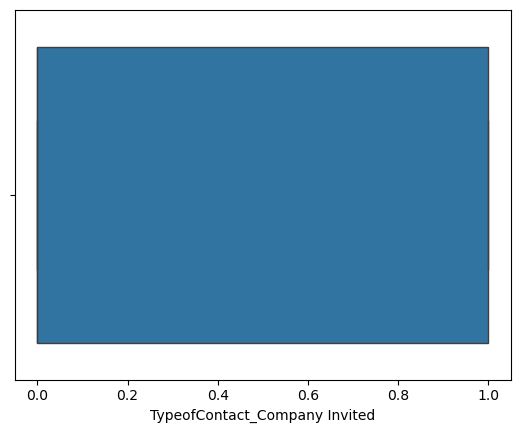

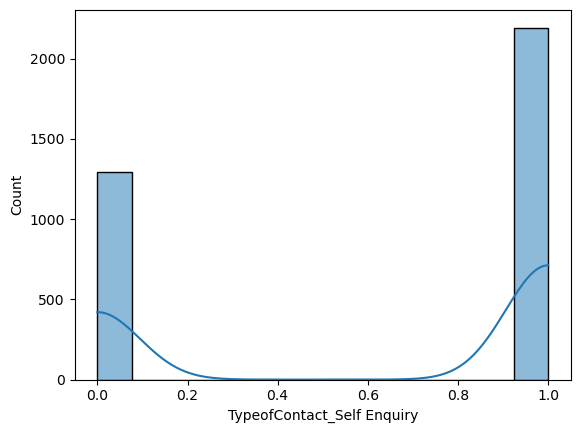

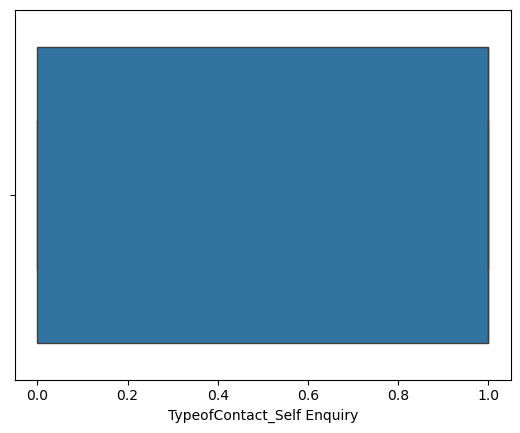

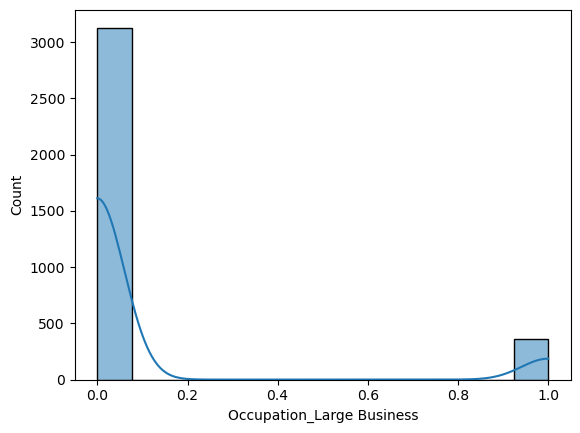

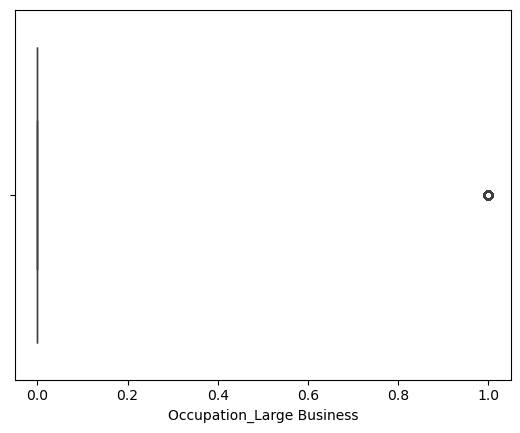

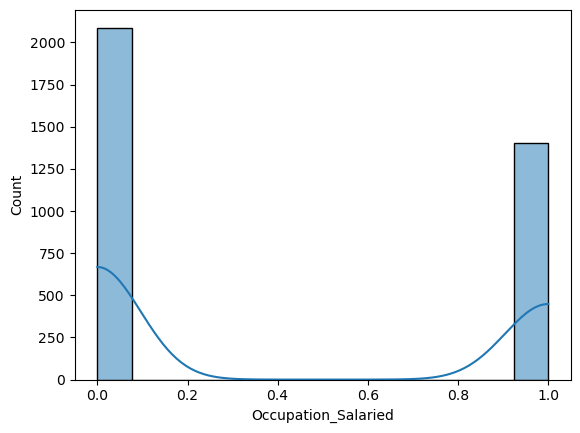

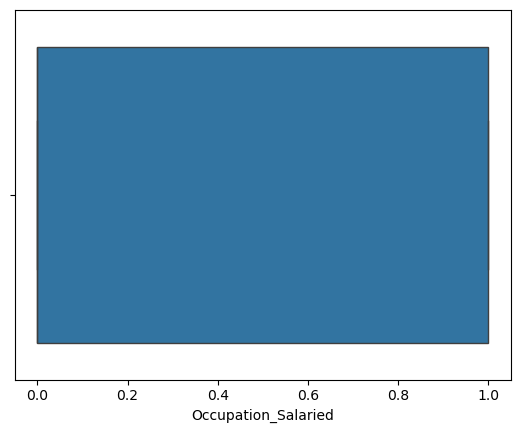

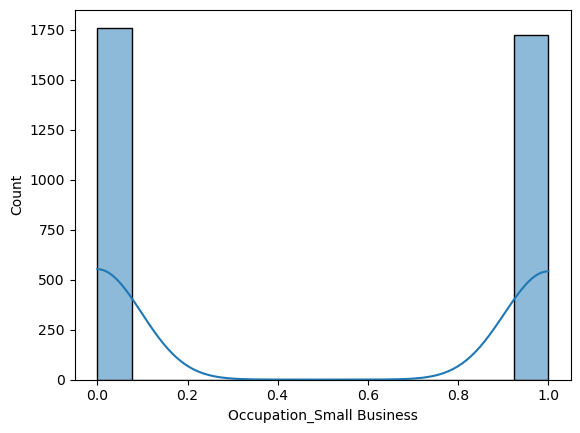

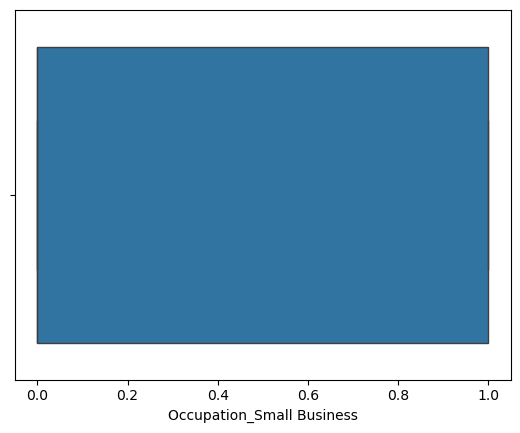

In [72]:
features = [ 'Age', 'DurationOfPitch', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips','Passport', 'PitchSatisfactionScore', 'Designation',
       'MonthlyIncome', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Large Business',
            'Occupation_Salaried', 'Occupation_Small Business']

# 外れ値の確認
for feature in features:
  sns.histplot(data = train, x = feature, kde = True)
  plt.show()
  sns.boxplot(data = train, x = feature)
  plt.show()


In [73]:
#特徴量が5０以下のものを削除
#train = train.drop(['TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business',
                        #'TypeofContact_Company Invited','Occupation_Large Business'],axis=1)
#test = test.drop(['TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business',
                        #'TypeofContact_Company Invited','Occupation_Large Business'],axis=1)

In [74]:
# LabelEncoderを使用して、カテゴリカルデータを数値に変換
label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])
test['Gender'] = label_encoder.fit_transform(test['Gender'])

train['ProductPitched'] = label_encoder.fit_transform(train['ProductPitched'])
test['ProductPitched'] = label_encoder.fit_transform(test['ProductPitched'])

train['Designation'] = label_encoder.fit_transform(train['Designation'])
test['Designation'] = label_encoder.fit_transform(test['Designation'])

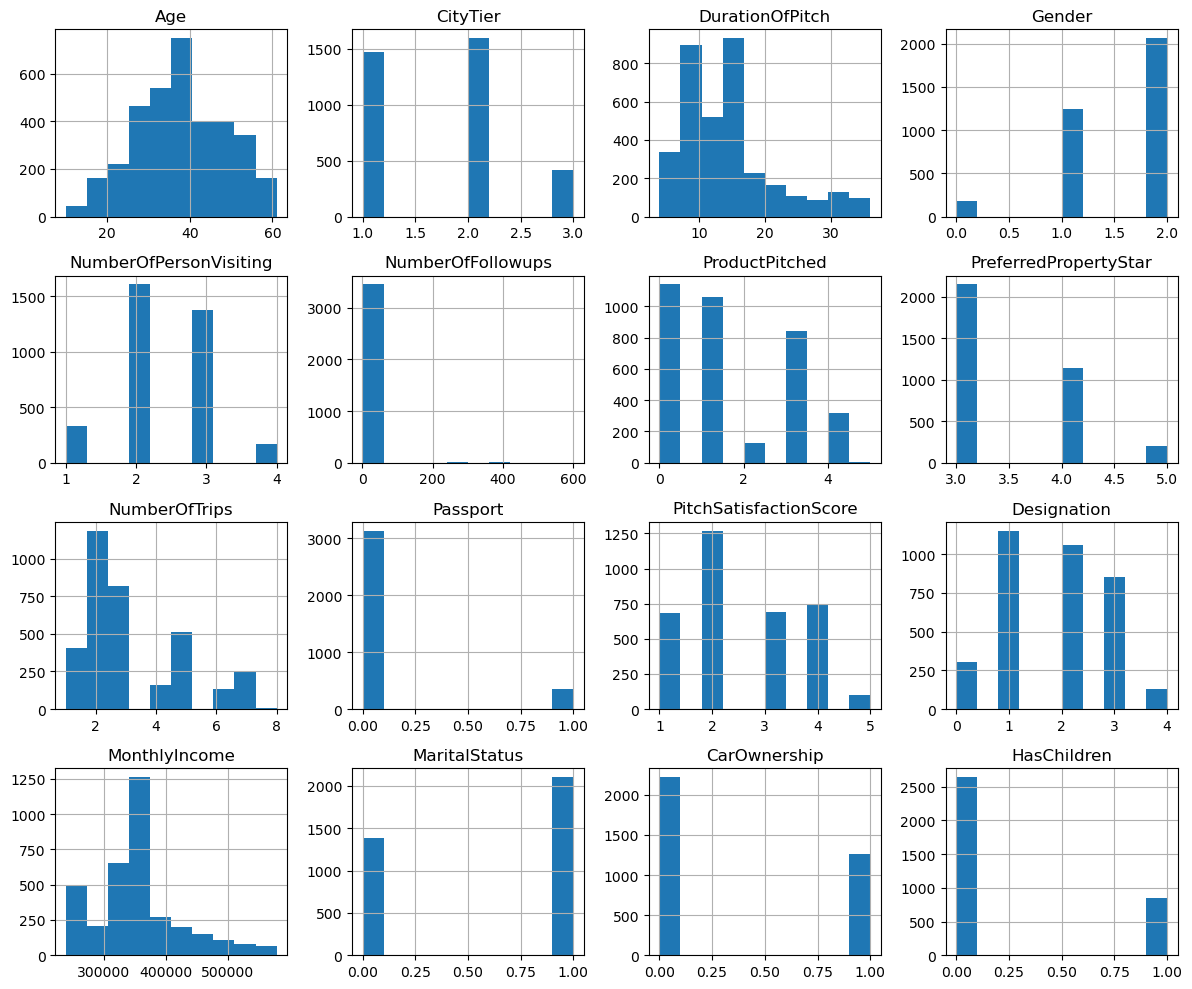

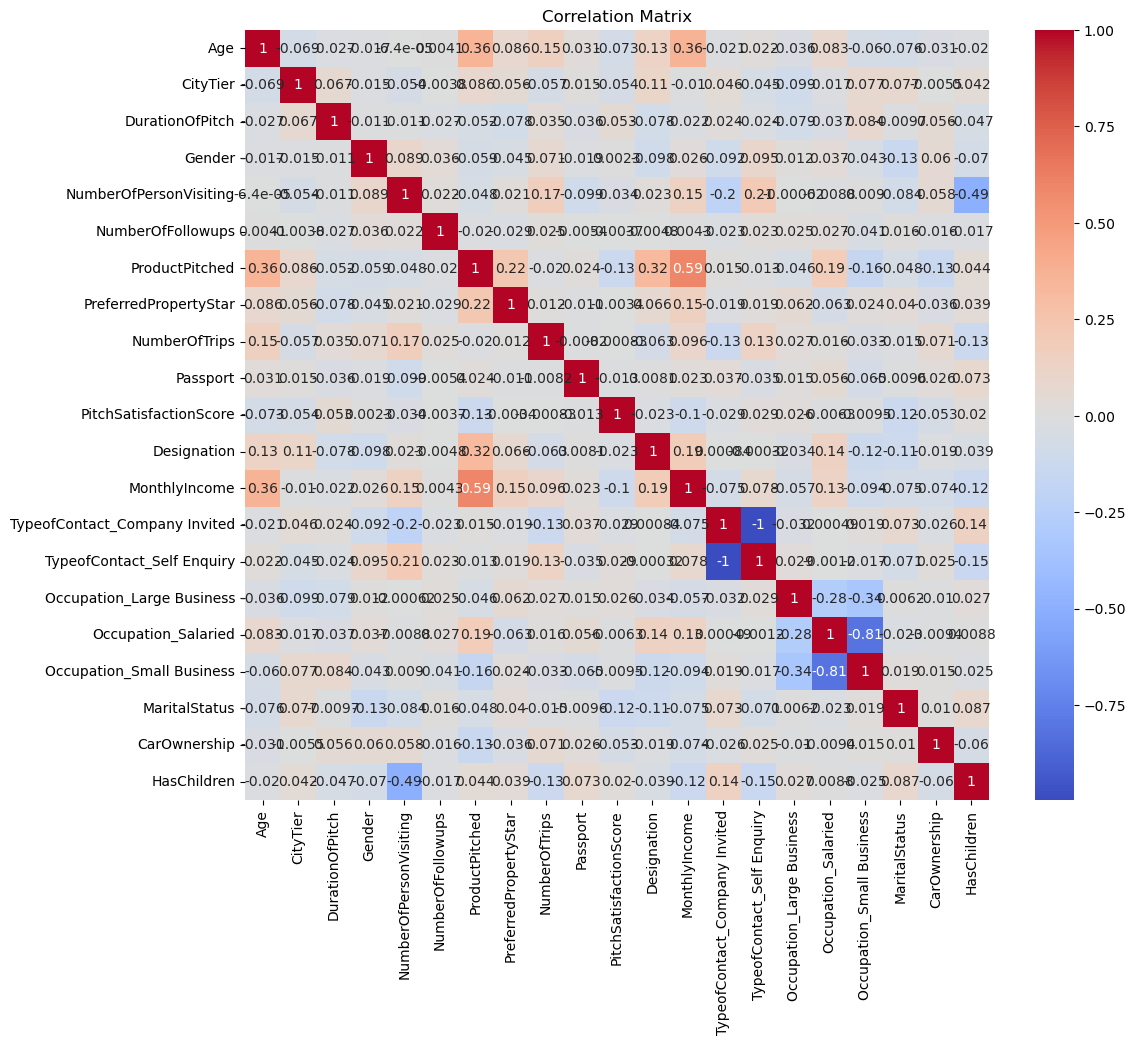

In [75]:
# ヒストグラムの作成
train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 相関行列の作成とヒートマップの表示
corr_matrix = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [76]:
import pandas as pd
from itertools import combinations
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate

In [77]:
# デフォルト
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
lgb_scores = cross_validate(lgb,X_train,y_train,scoring ="roc_auc",cv =5)

print("Average test score: ", lgb_scores["test_score"].mean())

# デフォルトのスコア
default_score = lgb_scores["test_score"].mean()

# # 掛け合わせた特徴量を探索
multiply_features = {}
for feat1, feat2 in combinations(X_train.columns, 2):
    multiply_feature = feat1 + "*" + feat2
    X_train[multiply_feature] = X_train[feat1]*X_train[feat2]

    lgb = LGBMClassifier()
    lgb.fit(X_train,y_train)
    lgb_scores = cross_validate(lgb,X_train,y_train,scoring ="roc_auc",cv =5)
    score = lgb_scores["test_score"].mean()

    if score > default_score:
        multiply_features[multiply_feature] = score
    X_train = X_train.drop(multiply_feature, axis=1)

# 足し合わせた特徴量を探索
add_features = {}
for feat1, feat2 in combinations(X_train.columns, 2):
    add_feature = feat1 + "+" + feat2
    X_train[add_feature] = X_train[feat1] + X_train[feat2]

    lgb = LGBMClassifier()
    lgb.fit(X_train,y_train)
    lgb_scores = cross_validate(lgb,X_train,y_train,scoring ="roc_auc",cv =5)
    score = lgb_scores["test_score"].mean()

    if score > default_score:
      add_features[add_feature] = score
    X_train = X_train.drop(add_feature, axis=1)

# print("Multiply Features:", multiply_features)
print("Add Features:", add_features)
# 比率を求めた特徴量を探索
ratio_features = {}
for feat1, feat2 in combinations(X_train.columns, 2):
    if X_train[feat2].min() != 0:  # Division by zero check
        ratio_feature = feat1 + "/" + feat2
        X_train[ratio_feature] = X_train[feat1] / X_train[feat2]

        lgb = LGBMClassifier()
        lgb.fit(X_train, y_train)
        lgb_scores = cross_validate(lgb, X_train, y_train, scoring="roc_auc", cv=5)
        score = lgb_scores["test_score"].mean()

        if score > default_score:
            ratio_features[ratio_feature] = score
        X_train = X_train.drop(ratio_feature, axis=1)
print("Ratio Features:", ratio_features)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 303, number of negative: 1789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number

In [78]:
for feat, score in multiply_features.items():
    if score >= 0.790:
        print(feat, "Score:", score)
for feat, score in add_features.items():
    if score >= 0.790:
        print(feat, "Score:", score)
for feat, score in ratio_features.items():
    if score >= 0.790:
        print(feat, "Score:", score)

Age*NumberOfFollowups Score: 0.7910378562808027
Age*Passport Score: 0.7918125798977309
DurationOfPitch*Designation Score: 0.7910528060924121
DurationOfPitch*MonthlyIncome Score: 0.7900155469420196
Gender*NumberOfPersonVisiting Score: 0.7941197567114094
Gender*MonthlyIncome Score: 0.7927575981690805
NumberOfPersonVisiting*ProductPitched Score: 0.7933842749701434
NumberOfPersonVisiting*Designation Score: 0.7940879505811509
NumberOfPersonVisiting*TypeofContact_Company Invited Score: 0.79229802852349
NumberOfPersonVisiting*Occupation_Small Business Score: 0.7906517709962826
NumberOfPersonVisiting*HasChildren Score: 0.7929047682124775
NumberOfFollowups*PreferredPropertyStar Score: 0.7932375112487595
NumberOfFollowups*HasChildren Score: 0.791679031366167
ProductPitched*TypeofContact_Company Invited Score: 0.7904973917596003
ProductPitched*Occupation_Large Business Score: 0.793134704420447
NumberOfTrips*TypeofContact_Self Enquiry Score: 0.7920792785234899
NumberOfTrips*Occupation_Salaried Sco

In [79]:
#トレインデータに生成した特徴量(和積)
#train["Gender＿MonthlyIncome"] = train["Gender"] * train["MonthlyIncome"]
#train['Gender_PreferredPropertyStar'] = train['Gender'] + train['PreferredPropertyStar']
#train['Gender_PreferredPropertyStar'] =  train['Gender'] +  train['PreferredPropertyStar']
#train['NumberOfPersonVisiting_PreferredPropertyStar'] = train['NumberOfPersonVisiting'] + train['PreferredPropertyStar']
#特徴量全部入れた時
#train["NumberOfPersonVisiting*Designation"] = train["NumberOfPersonVisiting"] * train["Designation"]
#train['PitchSatisfactionScore*HasChildren'] = train['PitchSatisfactionScore'] + train['HasChildren']
#train['Gender+NumberOfPersonVisiting'] =  train['Gender'] +  train['NumberOfPersonVisiting']
#train['Gender+MaritalStatus'] = train['Gender'] + train['MaritalStatus']
#テストデータに生成した特徴量（和積）
#test["Gender＿MonthlyIncome"] = test["Gender"] * test["MonthlyIncome"]
#test['CityTier_MonthlyIncome'] = test['CityTier'] * test['MonthlyIncome']
#test['Gender_PreferredPropertyStar'] = test['Gender'] + test['PreferredPropertyStar']
#test['NumberOfPersonVisiting_PreferredPropertyStar'] = test['NumberOfPersonVisiting'] + test['PreferredPropertyStar']
# testデータにも同じ新しい特徴量を追加
#test["NumberOfPersonVisiting*Designation"] = test["NumberOfPersonVisiting"] * test["Designation"]
#test['PitchSatisfactionScore*HasChildren'] = test['PitchSatisfactionScore'] + test['HasChildren']
#test['Gender+NumberOfPersonVisiting'] = test['Gender'] + test['NumberOfPersonVisiting']
#test['Gender+MaritalStatus'] = test['Gender'] + test['MaritalStatus']


ChatGPTより
Gender+MaritalStatus Score: 0.7953458525718659

ドメイン的観点: 性別と婚姻状況は旅行の成約率に影響を与える可能性があります。たとえば、家族旅行やカップル旅行の可能性が高いかもしれません。
NumberOfPersonVisiting*ProductPitched Score: 0.7933842749701434

ドメイン的観点: 訪問者の数と提案された商品との関係は、顧客の興味や購買意欲を示す可能性があります。
NumberOfPersonVisiting*Designation Score: 0.7940879505811509

ドメイン的観点: 訪問者の数と顧客の職位は、顧客の購買力や旅行の予算に関連している可能性があります。
Gender*NumberOfPersonVisiting Score: 0.7941197567114094

ドメイン的観点: 性別と訪問者の数の組み合わせは、旅行のグループ構成や旅行パターンに関する情報を提供するかもしれません。
Occupation_Large Business+MaritalStatus Score: 0.7936799333694976

ドメイン的観点: 大企業で働く人々の婚姻状況は、旅行のタイプや頻度に影響を与えるかもしれません。
CityTier+Gender Score: 0.7934542438310542

In [80]:
# 生成した特徴量を train データに追加

train["Gender+MaritalStatus"] = train["Gender"] + train["MaritalStatus"]
train["NumberOfPersonVisiting*ProductPitched"] = train["NumberOfPersonVisiting"] * train["ProductPitched"]
train["NumberOfPersonVisiting*Designation"] = train["NumberOfPersonVisiting"] * train["Designation"]
train["Gender*NumberOfPersonVisiting"] = train["Gender"] * train["NumberOfPersonVisiting"]
train["Occupation_Large Business+MaritalStatus"] = train["Occupation_Large Business"] + train["MaritalStatus"]
train["CityTier+Gender"] = train["CityTier"] + train["Gender"]

# テストデータに対しても同様の処理を適用
test["Gender+MaritalStatus"] = test["Gender"] + test["MaritalStatus"]
test["NumberOfPersonVisiting*ProductPitched"] = test["NumberOfPersonVisiting"] * test["ProductPitched"]
test["NumberOfPersonVisiting*Designation"] = test["NumberOfPersonVisiting"] * test["Designation"]
test["Gender*NumberOfPersonVisiting"] = test["Gender"] * test["NumberOfPersonVisiting"]
test["Occupation_Large Business+MaritalStatus"] = test["Occupation_Large Business"] + test["MaritalStatus"]
test["CityTier+Gender"] = test["CityTier"] + test["Gender"]


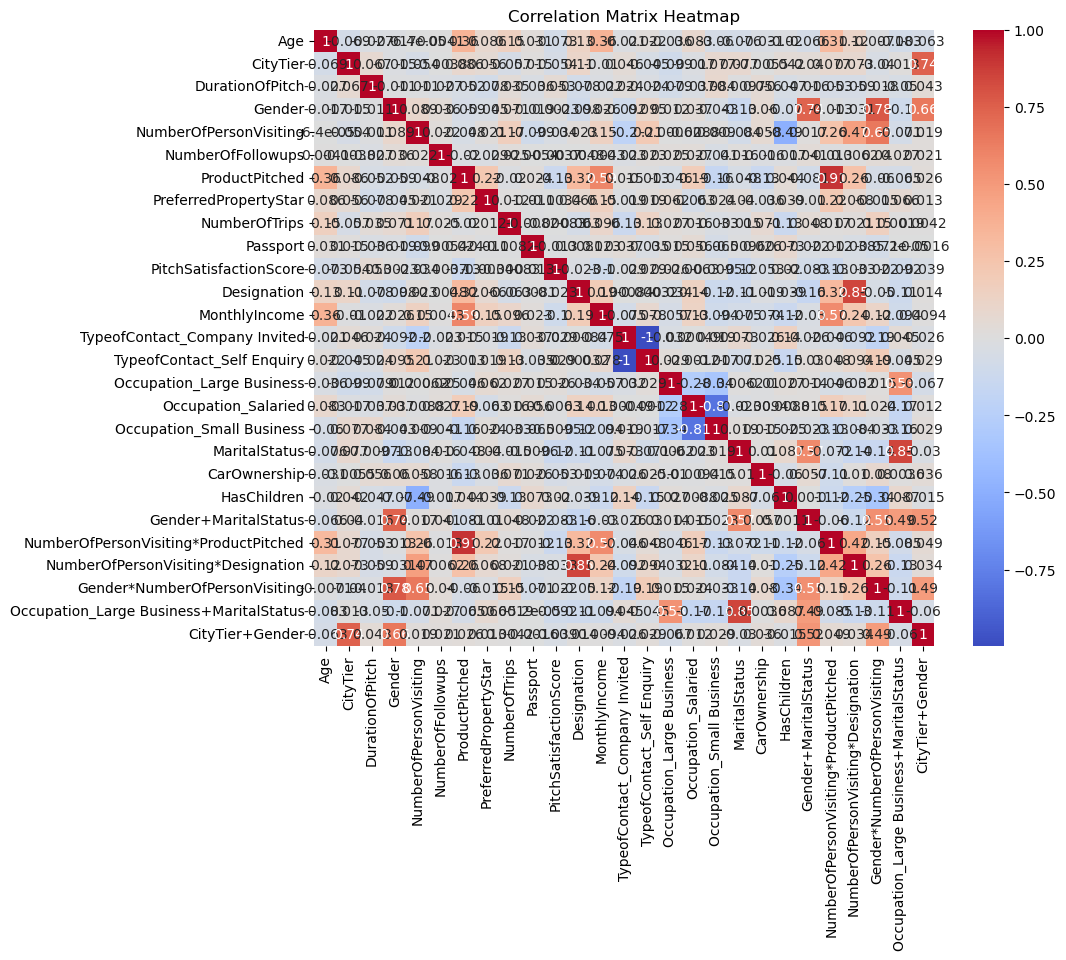

In [81]:
#相関行列を確認
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [82]:
#多重共線性の可能性があるため、相関が高い特徴量を削除
train = train.drop(['CityTier','MaritalStatus','Gender','ProductPitched','PitchSatisfactionScore','Designation' ,'NumberOfPersonVisiting'], axis=1)
test = test.drop(['CityTier','MaritalStatus','Gender','ProductPitched','PitchSatisfactionScore','Designation' ,'NumberOfPersonVisiting'], axis=1)


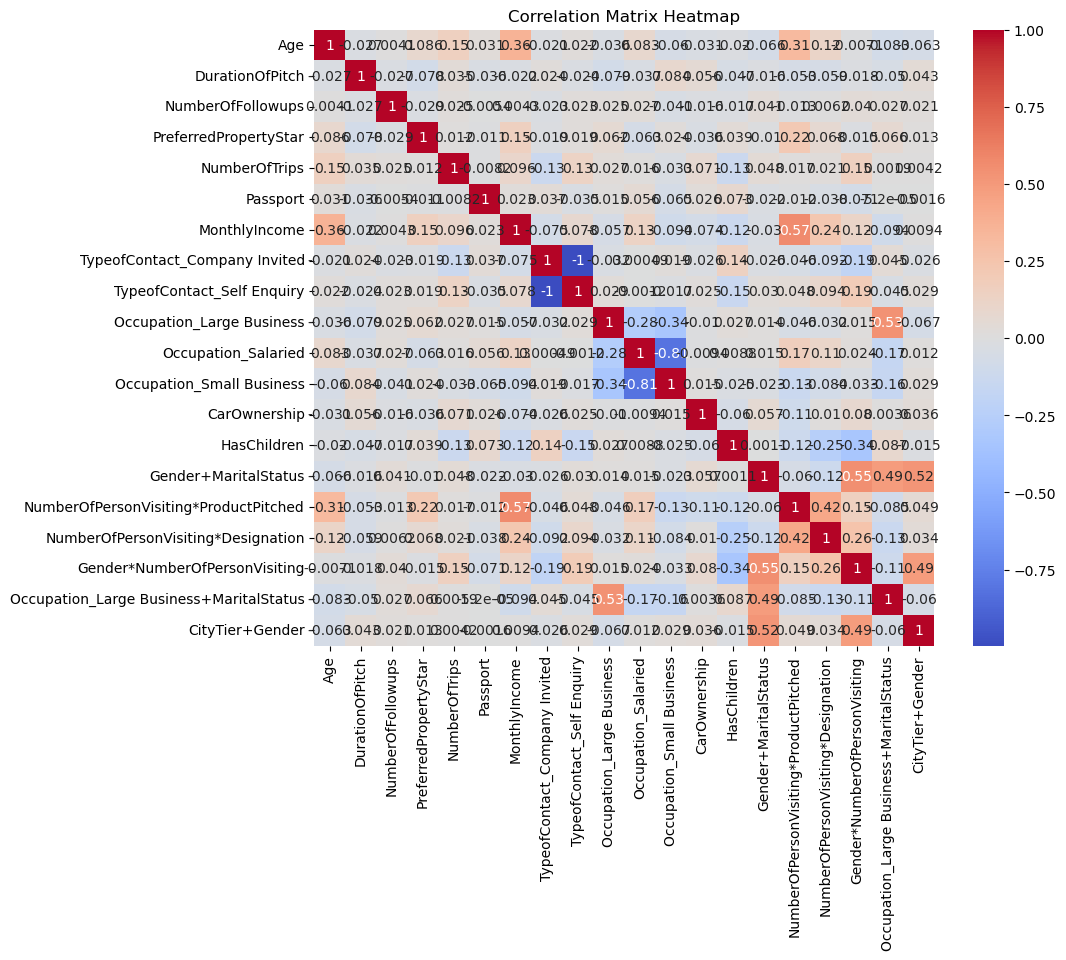

In [83]:
#相関行列を確認
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [84]:
train.shape

(3489, 20)

# 6.モデルの学習

In [85]:
X_train.head()

Age  CityTier  DurationOfPitch  Gender  NumberOfPersonVisiting  \
22    29.0         1              8.0       1                     1.0   
2400  52.0         1             16.0       2                     3.0   
1213  34.0         3             16.0       2                     2.0   
1070  47.0         2              8.0       2                     1.0   
2016  27.0         2             30.0       2                     3.0   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
22                  3.0               0                    3.0            1.0   
2400                3.0               0                    3.0            1.0   
1213                4.0               3                    4.0            2.0   
1070                3.0               3                    3.0            2.0   
2016                5.0               0                    3.0            3.0   

      Passport  ...  Designation  MonthlyIncome  \
22           0  ...            1       262725.0   
2400         0  ...            1       369420.0   
1213         0  ...            3       321090.0   
1070         0  ...            3       359895.0   
2016         0  ...            1       369420.0   

      TypeofContact_Company Invited  TypeofContact_Self Enquiry  \
22                             True                       False   
2400                           True                       False   
1213                          False                        True   
1070                           True                       False   
2016                          False                        True   

      Occupation_Large Business  Occupation_Salaried  \
22                        False                 True   
2400                       True                False   
1213                      False                False   
1070                      False                 True   
2016                      False                False   

      Occupation_Small Business  MaritalStatus  CarOwnership  HasChildren  
22                        False              1             1            1  
2400                      False              1             1            0  
1213                       True              0             1            1  
1070                      False              1             0            1  
2016                       True              1             0            0  

[5 rows x 21 columns]

In [86]:
# 標準化
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid for SGD

param_grid_SGD = {
    'alpha': np.logspace(-3, 3, 500)
}

# Initialize XGBClassifier
SGD= SGDClassifier(max_iter=5000)

# Perform GridSearchCV
grid_search_SGD = GridSearchCV(SGD, param_grid_SGD, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_SGD.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for SGDClassifier:", grid_search_SGD.best_params_)
print("Best score for SGDClassifier:", grid_search_SGD.best_score_)

Best parameters for SGDClassifier: {'alpha': 0.4670234388327335}
Best score for SGDClassifier: 0.7756124115281537


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for LogisticRegression

param_grid_LOG = {
    'C': [0.1, 1, 2, 5, 10],
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,8,8)]
}

LOG= LogisticRegression(max_iter=5000, penalty='l2')

# Perform GridSearchCV
grid_search_LOG = GridSearchCV(LOG, param_grid_LOG, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_LOG.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for Logistic:", grid_search_LOG.best_params_)
print("Best score for Logistic:", grid_search_LOG.best_score_)

Best parameters for Logistic: {'C': 0.1, 'class_weight': {0: 1, 1: 1.0}}
Best score for Logistic: 0.7778116707544221


In [90]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'n_estimators': [150],
    'learning_rate': [0.005, 0.015, 0.03],
    'num_leaves': [20],
    'max_depth': [5, 6, 8, 10],
    'reg_alpha': [0,1.0],
    'reg_lambda': [0,1.0]
}


# Initialize LGBMClassifier
lg = LGBMClassifier()

# Perform GridSearchCV
grid_search_lgbm = GridSearchCV(lg, param_grid_lgbm, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_lgbm.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for LGBMClassifier:", grid_search_lgbm.best_params_)
print("Best score for LGBMClassifier:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
Best parameters for LGBMClassifier: {'learning_rate': 0.015, 'max_depth': 8, 'n_estimators': 150, 'num_leaves': 20, 'reg_alpha': 1.0, 'reg_lambda': 0}
Best score for LGBMClassifier: 0.8115799446273544


In [91]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [150],
    'max_depth': [5, 8, 10],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [4, 6]
}
# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_rf.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best score for RandomForestClassifier:", grid_search_rf.best_score_)


Best parameters for RandomForestClassifier: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best score for RandomForestClassifier: 0.811286119169424


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [1, 10, 20, 30, 50],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type to be used
    'gamma': [0.0001,0.001]
}

# Initialize SVC
svc = SVC(probability=True)  # Make sure to set probability=True to use predict_proba()

# Perform GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid_svc, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_svc.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best score for SVC:", grid_search_svc.best_score_)


Best parameters for SVC: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for SVC: 0.7648734662943567


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.06, 0.08, 0.1, 0.15],
    'max_depth': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.8],
    'gamma': [0, 1],
    'reg_alpha': [1.0],
    'reg_lambda': [0, 1],
}

# Initialize XGBClassifier
xg = XGBClassifier()

# Perform RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xg, param_distributions=param_dist_xgb, n_iter=50, scoring='roc_auc', cv=10, n_jobs=-1)
random_search_xgb.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for XGBClassifier:", random_search_xgb.best_params_)
print("Best score for XGBClassifier:", random_search_xgb.best_score_)


Best parameters for XGBClassifier: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 1.0, 'n_estimators': 350, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best score for XGBClassifier: 0.8208700822206104


In [95]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.005, 0.01, 0.015, 0.03],
    'max_depth': [3, 6, 8],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.8],
    'gamma': [1.0],
    'reg_alpha': [1.0],
    'reg_lambda': [0],
}

# Initialize XGBClassifier
xg = XGBClassifier()

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xg, param_grid_xgb, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_xgb.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for XGBClassifier:", grid_search_xgb.best_params_)
print("Best score for XGBClassifier:", grid_search_xgb.best_score_)


Best parameters for XGBClassifier: {'colsample_bytree': 0.8, 'gamma': 1.0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 250, 'reg_alpha': 1.0, 'reg_lambda': 0, 'subsample': 0.7}
Best score for XGBClassifier: 0.8158504967044322


In [96]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Define the parameter grid for CatBoostClassifier
param_grid_catboost = {
    'iterations': [150, 250],
    'learning_rate': [0.001, 0.005, 0.015, 0.03],
    'depth': [6, 8, 10, 12],
    'l2_leaf_reg': [0, 1.0, 3.0],
    'border_count': [32, 64],
}

# Initialize CatBoostClassifier
CAT = CatBoostClassifier(early_stopping_rounds=50, verbose=0)  # Verbose=0 to suppress output

# Perform GridSearchCV
grid_search_catboost = GridSearchCV(CAT, param_grid_catboost, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_catboost.fit(X_train_sc, y_train)

# Print the best parameters and best score
print("Best parameters for CatBoostClassifier:", grid_search_catboost.best_params_)
print("Best score for CatBoostClassifier:", grid_search_catboost.best_score_)

Best parameters for CatBoostClassifier: {'border_count': 64, 'depth': 6, 'iterations': 250, 'l2_leaf_reg': 3.0, 'learning_rate': 0.015}
Best score for CatBoostClassifier: 0.817157063953515


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score

# Define and train individual models
models = {
    'LGBM': LGBMClassifier(learning_rate= 0.015, max_depth= 8, n_estimators= 150, num_leaves= 20, reg_alpha= 1.0, reg_lambda= 0),
    'RF': RandomForestClassifier(max_depth= 20, min_samples_leaf= 4, min_samples_split= 20, n_estimators= 150),
    'SVC': SVC(probability=True, C= 0.08, gamma= 'auto', kernel= 'rbf'),  # SVC needs probability=True for stacking
    'XGB': XGBClassifier(subsample= 0.8, reg_lambda= 0, reg_alpha= 0, n_estimators= 350, max_depth= 1, learning_rate= 0.08, gamma= 1.0, colsample_bytree= 0.8),
    'SGD': SGDClassifier(loss='log_loss',alpha= np.float64(0.021610725088083777)),
    'CAT': CatBoostClassifier(early_stopping_rounds=50, verbose=0) 
}

# Fit models
for name, model in models.items():
    model.fit(X_train_sc, y_train)

# Get predictions for validation set
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict_proba(X_valid_sc)[:, 1]  # Probability for positive class

# Print sample predictions
for name, preds in predictions.items():
    print(f"{name} predictions (first 5):", preds[:5])


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
LGBM predictions (first 5): [0.12900387 0.03144683 0.05122523 0.25435622 0.10948761]
RF predictions (first 5): [0.1168935  0.02903573 0.02765841 0.39123318 0.11058859]
SVC predictions (first 5): [0.11881092 0.09047789 0.1048799  0.21776629 0.11206351]
XGB predictions (first 5): [0.06901549 0.01127003 0.03519063 0.45599738 0.10310697]
SGD predictions (first 5): [0.06011447 0.02470278 0.02134038 0.30589843 0.1373905 ]
CAT predictions (first 5): [0.07760672 0.0085372  0.02706412 0.3817674  0.09788311]


In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline

# Define pairs of models for voting
pairs = [
    (['LGBM', 'RF'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('RF', models['RF'])], voting='soft')),
    (['LGBM', 'SVC'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('SVC', models['SVC'])], voting='soft')),
    (['LGBM', 'XGB'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('XGB', models['XGB'])], voting='soft')),
    (['RF', 'SVC'], VotingClassifier(estimators=[('RF', models['RF']), ('SVC', models['SVC'])], voting='soft')),
    (['RF', 'XGB'], VotingClassifier(estimators=[('RF', models['RF']), ('XGB', models['XGB'])], voting='soft')),
    (['SVC', 'XGB'], VotingClassifier(estimators=[('SVC', models['SVC']), ('XGB', models['XGB'])], voting='soft')),
    (['LGBM', 'SGD'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('SGD', models['SGD'])], voting='soft')),   
    (['SGD', 'XGB'], VotingClassifier(estimators=[('SGD', models['SGD']), ('XGB', models['XGB'])], voting='soft')),
    (['SGD', 'RF'], VotingClassifier(estimators=[('SGD', models['SGD']), ('RF', models['RF'])], voting='soft')),
    (['SGD', 'SVC'], VotingClassifier(estimators=[('SGD', models['SGD']), ('SVC', models['SVC'])], voting='soft')),
    (['LGBM', 'CAT'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('CAT', models['CAT'])], voting='soft')),   
    (['CAT', 'XGB'], VotingClassifier(estimators=[('CAT', models['CAT']), ('XGB', models['XGB'])], voting='soft')),
    (['CAT', 'RF'], VotingClassifier(estimators=[('CAT', models['CAT']), ('RF', models['RF'])], voting='soft')),
    (['CAT', 'SVC'], VotingClassifier(estimators=[('CAT', models['CAT']), ('SVC', models['SVC'])], voting='soft')),
    (['CAT', 'SGD'], VotingClassifier(estimators=[('CAT', models['CAT']), ('SGD', models['SGD'])], voting='soft'))

]

# Train and evaluate pairs
for names, ensemble in pairs:
    ensemble.fit(X_train_sc, y_train)
    preds = ensemble.predict_proba(X_valid_sc)[:, 1]
    score = roc_auc_score(y_valid, preds)
    print(f"ROC AUC score for ensemble of {names}: {score}")


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
ROC AUC score for ensemble of ['LGBM', 'RF']: 0.8524750252553597
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:B

In [99]:
from sklearn.ensemble import VotingClassifier

# Define triplets of models for voting
triplets = [
    (['LGBM', 'RF', 'SVC'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('RF', models['RF']), ('SVC', models['SVC'])], voting='soft')),
    (['LGBM', 'RF', 'XGB'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('RF', models['RF']), ('XGB', models['XGB'])], voting='soft')),
    (['LGBM', 'SVC', 'XGB'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('SVC', models['SVC']), ('XGB', models['XGB'])], voting='soft')),
    (['RF', 'SVC', 'XGB'], VotingClassifier(estimators=[('RF', models['RF']), ('SVC', models['SVC']), ('XGB', models['XGB'])], voting='soft')),
    (['SGD', 'RF', 'SVC'], VotingClassifier(estimators=[('SGD', models['SGD']), ('RF', models['RF']), ('SVC', models['SVC'])], voting='soft')),
    (['SGD', 'RF', 'XGB'], VotingClassifier(estimators=[('SGD', models['SGD']), ('RF', models['RF']), ('XGB', models['XGB'])], voting='soft')),
    (['SGD', 'SVC', 'XGB'], VotingClassifier(estimators=[('SGD', models['SGD']), ('SVC', models['SVC']), ('XGB', models['XGB'])], voting='soft')),
    (['LGBM', 'SVC', 'SGD'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('SVC', models['SVC']), ('SGD', models['SGD'])], voting='soft')),
    (['CAT', 'RF', 'SVC'], VotingClassifier(estimators=[('CAT', models['CAT']), ('RF', models['RF']), ('SVC', models['SVC'])], voting='soft')),
    (['CAT', 'RF', 'XGB'], VotingClassifier(estimators=[('CAT', models['CAT']), ('RF', models['RF']), ('XGB', models['XGB'])], voting='soft')),
    (['CAT', 'SVC', 'XGB'], VotingClassifier(estimators=[('CAT', models['CAT']), ('SVC', models['SVC']), ('XGB', models['XGB'])], voting='soft')),
    (['LGBM', 'SVC', 'CAT'], VotingClassifier(estimators=[('LGBM', models['LGBM']), ('SVC', models['SVC']), ('CAT', models['CAT'])], voting='soft'))
]

# Train and evaluate triplets
for names, ensemble in triplets:
    ensemble.fit(X_train_sc, y_train)
    preds = ensemble.predict_proba(X_valid_sc)[:, 1]
    score = roc_auc_score(y_valid, preds)
    print(f"ROC AUC score for ensemble of {names}: {score}")


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
ROC AUC score for ensemble of ['LGBM', 'RF', 'SVC']: 0.8502301043888203
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the t

In [100]:
from sklearn.ensemble import StackingClassifier

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('LGBM', models['LGBM']),
        ('RF', models['RF']),
        ('SVC', models['SVC']),
        ('XGB', models['XGB']),
        ('SGD', models['SGD']),
        ('CAT', models['CAT']),
    ],
    final_estimator=LogisticRegression()
)

# Train and evaluate stacking classifier
stacking_clf.fit(X_train_sc, y_train)
stacking_preds = stacking_clf.predict_proba(X_valid_sc)[:, 1]
stacking_score = roc_auc_score(y_valid, stacking_preds)

print(f"ROC AUC score for stacking classifier: {stacking_score}")


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 303, number of negative: 1789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144837 -> initscore=-1.775679
[LightGBM] [

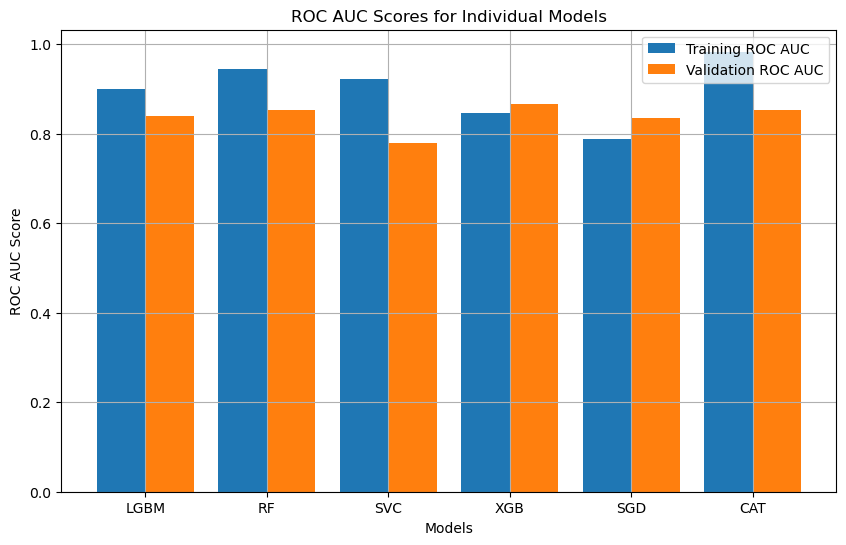

In [102]:
import matplotlib.pyplot as plt

# Lists to store model names and scores
model_names = []
train_scores = []
valid_scores = []

# Collecting scores
for name, model in models.items():
    # Predictions on training set
    train_preds = model.predict_proba(X_train_sc)[:, 1]
    train_score = roc_auc_score(y_train, train_preds)
    
    # Predictions on validation set
    valid_preds = model.predict_proba(X_valid_sc)[:, 1]
    valid_score = roc_auc_score(y_valid, valid_preds)
    
    model_names.append(name)
    train_scores.append(train_score)
    valid_scores.append(valid_score)

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(model_names))
plt.bar(x, train_scores, width=0.4, label='Training ROC AUC', align='center')
plt.bar([i + 0.4 for i in x], valid_scores, width=0.4, label='Validation ROC AUC', align='center')

plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores for Individual Models')
plt.xticks([i + 0.2 for i in x], model_names)
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [

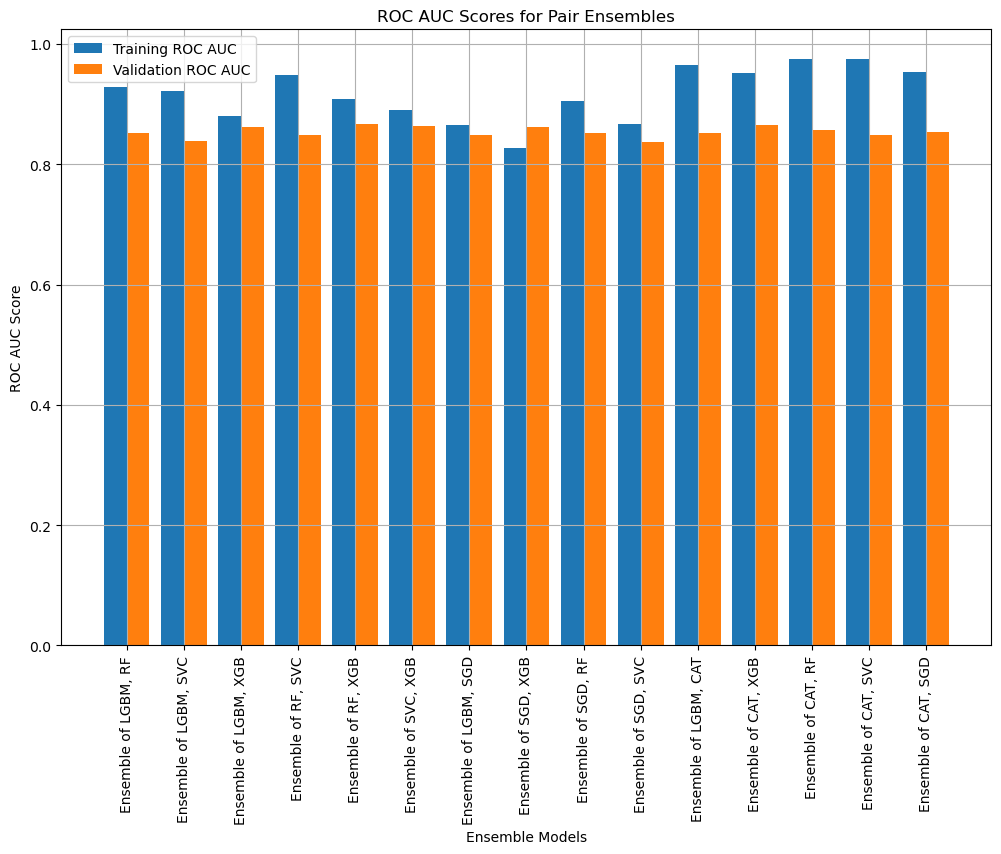

In [103]:
# Lists to store ensemble names and scores
ensemble_names = []
train_scores = []
valid_scores = []

# Collecting scores
for names, ensemble in pairs:
    # Fit and predict on training set
    ensemble.fit(X_train_sc, y_train)
    train_preds = ensemble.predict_proba(X_train_sc)[:, 1]
    train_score = roc_auc_score(y_train, train_preds)
    
    # Predict on validation set
    valid_preds = ensemble.predict_proba(X_valid_sc)[:, 1]
    valid_score = roc_auc_score(y_valid, valid_preds)
    
    ensemble_names.append(f'Ensemble of {", ".join(names)}')
    train_scores.append(train_score)
    valid_scores.append(valid_score)

# Plotting
plt.figure(figsize=(12, 8))
x = range(len(ensemble_names))
plt.bar(x, train_scores, width=0.4, label='Training ROC AUC', align='center')
plt.bar([i + 0.4 for i in x], valid_scores, width=0.4, label='Validation ROC AUC', align='center')

plt.xlabel('Ensemble Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores for Pair Ensembles')
plt.xticks([i + 0.2 for i in x], ensemble_names, rotation=90)
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Numb

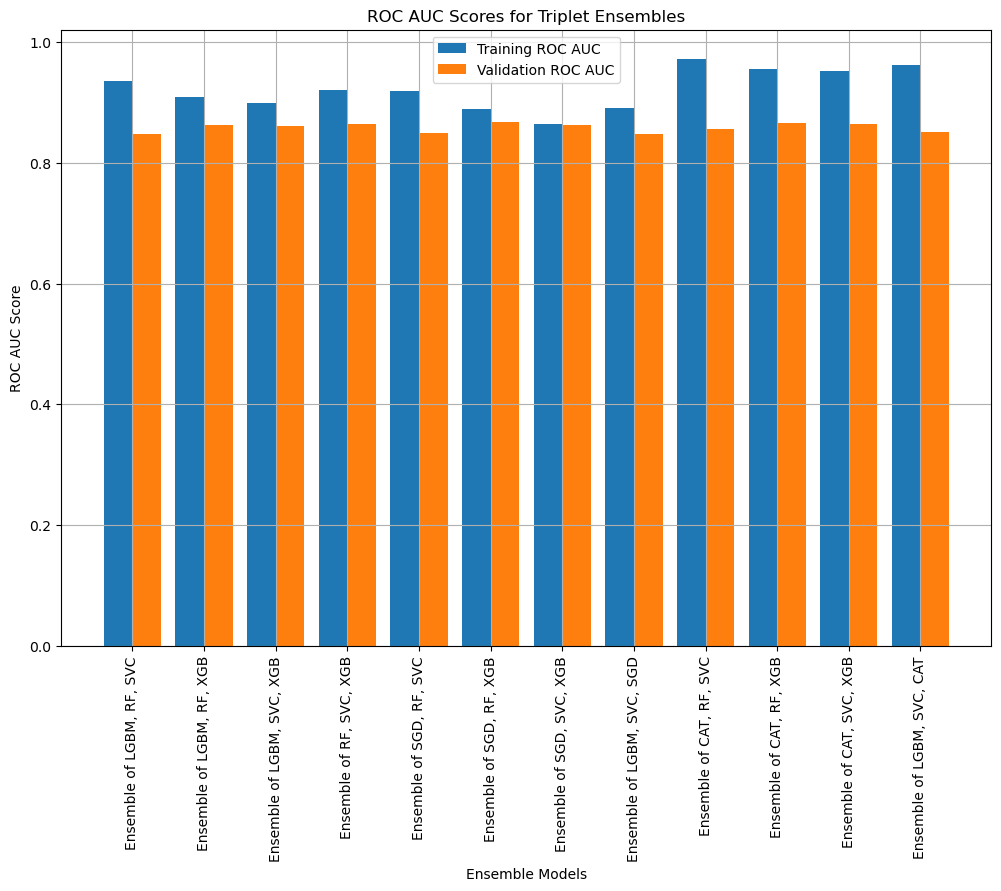

In [104]:
# Lists to store ensemble names and scores
triplet_names = []
train_scores = []
valid_scores = []

# Collecting scores
for names, ensemble in triplets:
    # Fit and predict on training set
    ensemble.fit(X_train_sc, y_train)
    train_preds = ensemble.predict_proba(X_train_sc)[:, 1]
    train_score = roc_auc_score(y_train, train_preds)
    
    # Predict on validation set
    valid_preds = ensemble.predict_proba(X_valid_sc)[:, 1]
    valid_score = roc_auc_score(y_valid, valid_preds)
    
    triplet_names.append(f'Ensemble of {", ".join(names)}')
    train_scores.append(train_score)
    valid_scores.append(valid_score)

# Plotting
plt.figure(figsize=(12, 8))
x = range(len(triplet_names))
plt.bar(x, train_scores, width=0.4, label='Training ROC AUC', align='center')
plt.bar([i + 0.4 for i in x], valid_scores, width=0.4, label='Validation ROC AUC', align='center')

plt.xlabel('Ensemble Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores for Triplet Ensembles')
plt.xticks([i + 0.2 for i in x], triplet_names, rotation=90)
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 303, number of negative: 1789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 21
[LightGBM] [Info] [binary:Bo

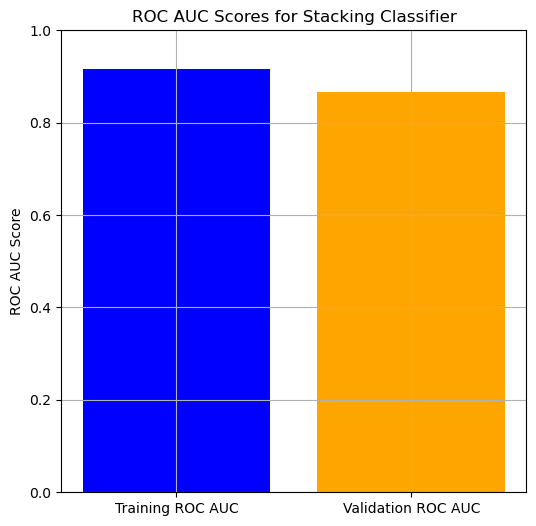

In [105]:
# Fit and evaluate stacking classifier
stacking_clf.fit(X_train_sc, y_train)

# Predictions on training set
train_preds = stacking_clf.predict_proba(X_train_sc)[:, 1]
train_score = roc_auc_score(y_train, train_preds)

# Predictions on validation set
valid_preds = stacking_clf.predict_proba(X_valid_sc)[:, 1]
valid_score = roc_auc_score(y_valid, valid_preds)

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(['Training ROC AUC', 'Validation ROC AUC'], [train_score, valid_score], color=['blue', 'orange'])
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores for Stacking Classifier')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [114]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score

# Define the base models and the stacking model
base_models = [
    ('LGBM', grid_search_lgbm.best_estimator_),
    ('rf', grid_search_rf.best_estimator_),
    ('SVC',grid_search_svc.best_estimator_),
    ('XGB', grid_search_xgb.best_estimator_),
    ('SGD', grid_search_SGD.best_estimator_),
    ('CAT', grid_search_catboost.best_estimator_)
]

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()  # Or another suitable final estimator
)

# Fit the stacking classifier
stacking_clf.fit(X_train_sc, y_train)

# Predictions on validation set
valid_preds = stacking_clf.predict_proba(X_valid_sc)[:, 1]
valid_score = roc_auc_score(y_valid, valid_preds)

# Print the ROC AUC score for the stacking classifier
print(f'ROC AUC score for stacking classifier: {valid_score}')


[LightGBM] [Info] Number of positive: 379, number of negative: 2237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775355
[LightGBM] [Info] Start training from score -1.775355
[LightGBM] [Info] Number of positive: 303, number of negative: 1789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 21
[LightGBM] [Info] [binary:Bo

In [118]:
# Define models with their respective GridSearchCV objects
models = {
    'LGBMClassifier': grid_search_lgbm,
    'RandomForestClassifier': grid_search_rf,
    'SVC': grid_search_svc,
    'XGBClassifier': grid_search_xgb,
    'SGD': grid_search_SGD.best_estimator_,
    'CAT': grid_search_catboost.best_estimator_
}

# Create a dictionary for ensemble models
ensemble_models = {
    'Ensemble_LGBM_RF_SVC': stacking_clf
}

# Determine the best model based on ROC AUC score
best_model_name = 'Ensemble_LGBM_RF_SVC'
best_model = ensemble_models[best_model_name]

print("Best model:", best_model_name)

# Make predictions with the best model
pred = best_model.predict_proba(X_valid_sc)[:, 1]  # Probabilities for the positive class

# Display a sample of the predicted probabilities
print("Sample of predicted probabilities:", pred[:5])


Best model: Ensemble_LGBM_RF_SVC
Sample of predicted probabilities: [0.0830244  0.05125577 0.0588819  0.32347598 0.10048578]


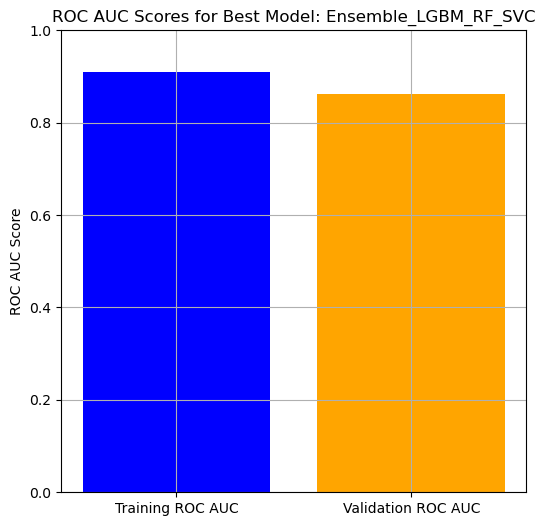

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Predictions on training set
train_preds = best_model.predict_proba(X_train_sc)[:, 1]
train_score = roc_auc_score(y_train, train_preds)

# Predictions on validation set
valid_preds = best_model.predict_proba(X_valid_sc)[:, 1]
valid_score = roc_auc_score(y_valid, valid_preds)

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(['Training ROC AUC', 'Validation ROC AUC'], [train_score, valid_score], color=['blue', 'orange'])
plt.ylabel('ROC AUC Score')
plt.title(f'ROC AUC Scores for Best Model: {best_model_name}')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [120]:
# predict_proba() で予測します。予測したいデータを入力します。
pred = best_model.predict_proba(X_valid_sc)

In [121]:
# 予測の中身を確認します
print(pred[:5])

[[0.9169756  0.0830244 ]
 [0.94874423 0.05125577]
 [0.9411181  0.0588819 ]
 [0.67652402 0.32347598]
 [0.89951422 0.10048578]]


In [122]:
# AUCの評価はroc_auc_score(正解データ, 予測データ)で可能です。
# 成約したかどうかを判定するため、2列目の1の確率(成約している確率)を予測データとして入力します。
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

0.8624649231114603


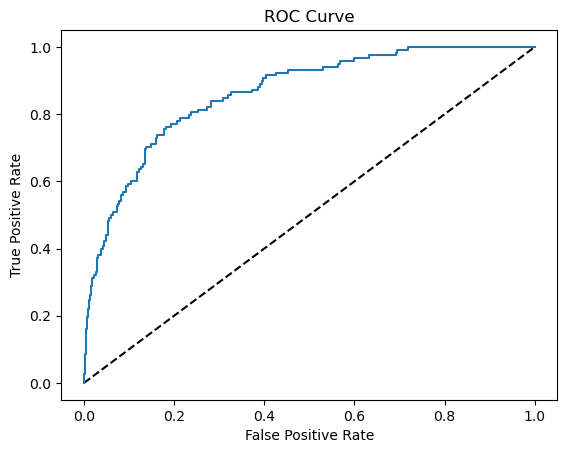

In [123]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 7.提出

In [124]:
# テストデータを用いて予測します。
predict = best_model.predict_proba(test_sc)

In [125]:
# submit_sample.csvを読み込みます。
submit = pd.read_csv("C:/Users/histan/Desktop/Personal Files/立教大学/コンペ/Signate/sample_submit.csv", header=None)
submit.head()

0         1
0  3489  0.119451
1  3490  0.343575
2  3491  0.119451
3  3492  0.119451
4  3493  0.119451

In [126]:
print("Submit DataFrame shape:", submit.shape)
predict

Submit DataFrame shape: (3489, 2)


array([[0.91253702, 0.08746298],
       [0.84793306, 0.15206694],
       [0.80047489, 0.19952511],
       ...,
       [0.56154212, 0.43845788],
       [0.78321046, 0.21678954],
       [0.95101632, 0.04898368]])

In [127]:
print("Length of predictions:", len(predict[:, 1]))
print("Number of rows in submit DataFrame:", submit.shape[0])


Length of predictions: 3489
Number of rows in submit DataFrame: 3489


In [128]:
# 提出ファイルの2列目を予測値で置き換えます。
submit[1] = predict[:, 1]

In [133]:
#確認してみましょう
submit.head()

0         1
0  3489  0.087463
1  3490  0.152067
2  3491  0.199525
3  3492  0.509316
4  3493  0.255007

In [134]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとしてください。)
submit.to_csv("submission20240827.csv", index=False, header=None)